# Project Introduction 

The field of medical science is one that has evolved over millennia as humans actively seek to understand and treat human ailments and diseases. In this modern, data-driven age, patient data can be a great source of understanding how different internal and external biological features influence the outcome of sick patients.

This project incudes a dataset which provides medical data for different patients with a column that specifies whether the patient survived their hospital stay or not. The purpose of this project is to use statistics, data analysis, and machine learning to build a model that will use various medical data as features to classify patient survivability.

To this end, this project is a classification problem.

The project lifecycle will follow CRISP-DM process, namely:

1. Business (Domain) Understanding
2. Data Understanding
3. Data Exploration and Analysis
4. Data Cleaning and Preparation
5. Modeling
6. Evaluation
7. Deployment

The Data used in this project is publicly available on [Kaggle](https://www.kaggle.com/datasets/sadiaanzum/patient-survival-prediction-dataset?resource=download&select=Dataset.csv). There is **no** personally identifiable information in the data. The data includes two datasets: 

- patient medical data
- a medical data dictionary which provides information and clarity on what each of the data fields of the first dataset represent

**Please note:** I do not own any part of the data used below, and full accreditation to its provision goes to the source publisher on Kaggle (Sadia Anzum). Please use the link provided above to obtain more information about the data used and the author.

In terms of project structure and imported libraries, each library is imported as needed throughout the project on a section by section basis.

# 1. Business Understanding: Medical

The nature of medical diagnosis for sick patients is highly contextual, with many potential internal and external factors affecting the overall health and hence medical diagnosis of the patients.

Some factors to consider when diagnosing a patient include:

- demographic
- vitals
- laboratory results (from medical tests)
- comorbidity (multiple diseases in a patient)
- genetic and hereditary influences
- daily lifestyle

A dataset that has information on as many of these factors as possible would go a long way in assisting with the understanding of how each of these factors contributes overall to patient health. Given that this project is concerned with patient survivability, each of these factors **should** be analysed and considered with the probability (or actual) of patient survival in mind.

Something to consider is that many patients that enter hospital premisis requiring care usually do so under traumatic conditions. This results in their inability to provide medical practitioners with all the necessary information that could help ensure their survival. By understanding how a few key factors would affect the probability of patient survival, it is possible to maximise the incoming information for medical practitioners, and hence ensure the best possible care is provided for the patients. This in turn will likely increase the probability that the patients survive.

## 1.1. The APACHE Framework

According to this [site](https://en.wikipedia.org/wiki/APACHE_II#APACHE_III), the APACHE medical framework is a severity-of-disease classification system in the USA, where APACHE stands for "Acute Physiology and Chronic Health Evaluation". APACHE is applied to patients within 24 hours of being admitted into ICU (Intensive Care Unit), and a score is received, where a higher score indicates greater severity of disease, and hence lower probability of patient survival.

The APACHE system comprises of multiple medical measurements and metrics taken from the patient. It has not been validated for use for people under the age of 16. There are multiple levels of APACHE framework, where each successive level is an improvement on the previous iteration. The latest APACHE version is APACHE IV, which was established in 2006. However, earlier versions such as APACHE II are still extensively used due to the availability of comprehensive documentation. Depending on which system is being used, the possible range of the APACHE score changes, where later versions usually have higher number of metrics than previous iterations.

The benefit of taking a data approach with a problem like this is that statistical and broader data analyses should be able to provide insights as to how each of the aforementioned factors affect each other and the patient as a whole, which is why a comprehensive understanding of the dataset is the next important step in this project.

# 2. Data Understanding

The most important tool for understanding the data to be used in this project is the data dictionary, alongside the data analysis and exploration that will be conducted in the next section. The data dictionary provides information on how each of the data columns in the patient dataset should be interpreted and what they represent.

In [1]:
# import initial libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

sns.set()

pd.set_option('display.max_colwidth', None)  # ensures non-truncation of lengthy columns

## 2.1. Medical Dictionary

In [2]:
# import medical data dictionary

medical_dictionary = pd.read_csv('medical_data_key.csv')

print(medical_dictionary.shape)
medical_dictionary.describe()

(188, 6)


,Category,Variable Name,Unit of Measure,Data Type,Description,Example
count,188,188,188,188,187,188
unique,10,188,18,4,185,42
top,labs,encounter_id,Millimetres of mercury,numeric,The lowest albumin concentration of the patient in their serum during the first 24 hours of their unit stay,1
freq,60,1,48,153,2,19


In [3]:
medical_dictionary.head()

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,None,integer,Unique identifier associated with a patient unit stay,None
1,identifier,hospital_id,None,integer,Unique identifier associated with a hospital,None
2,identifier,patient_id,None,integer,Unique identifier associated with a patient,None
3,demographic,hospital_death,None,binary,Whether the patient died during this hospitalization,0
4,demographic,age,Years,numeric,The age of the patient on unit admission,None


The above two cells demonstrate the medical dictionary's usefulness. For each of the 188 columns (Variable Name) used in the patient medical dataset (this is the dataset that will be used for modelling andanalysis purposes), an example of how the data is structured is provided. Each of the Variable Name columns is associated with a broader category, and has a brief description providing useful information.

The below sections will break the problem down into consumable portions.

In [4]:
# Examine each of the categories that define the 188 columns

medical_dictionary['Category'].value_counts()

labs                         60
vitals                       52
APACHE covariate             28
demographic                  16
labs blood gas               16
APACHE comorbidity            8
identifier                    3
APACHE prediction             2
APACHE grouping               2
GOSSIS example prediction     1
Name: Category, dtype: int64

### 2.1.1. Identifier

In [5]:
# establish nature and purpose of the identifier columns

medical_dictionary[medical_dictionary['Category'] == 'identifier']

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,None,integer,Unique identifier associated with a patient unit stay,None
1,identifier,hospital_id,None,integer,Unique identifier associated with a hospital,None
2,identifier,patient_id,None,integer,Unique identifier associated with a patient,None


Unsurprisingly, it would seem these columns are used to identify hospitals, patients and patient units. These variables are unlikely to provide any useful information for a predictive model and will be removed during the data preparation and cleaning stage.

### 2.1.2. APACHE Prediction

In [6]:
# establish nature and purpose of the APACHE Prediction columns

medical_dictionary[medical_dictionary['Category'] == 'APACHE prediction']

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
175,APACHE prediction,apache_4a_hospital_death_prob,None,numeric,"The APACHE IVa probabilistic prediction of in-hospital mortality for the patient which utilizes the APACHE III score and other covariates, including diagnosis.",0.31
176,APACHE prediction,apache_4a_icu_death_prob,None,numeric,"The APACHE IVa probabilistic prediction of in ICU mortality for the patient which utilizes the APACHE III score and other covariates, including diagnosis",0.24


These variables would appear to be the target variables, utilizing the APACHE IV classification framework. One variable is concerned with general hospital survivability, while the other is specifically concerned with ICU survivability. The higher the probability, the higher the chance of patient death.

It is likely that only one of these variables will be used when the models are developed in later sections of this project, assuming that the problem statement is not concerned with the actual deaths of patients as opposed to probabilities of death.

### 2.1.3. APACHE Grouping

In [7]:
# establish nature and purpose of the APACHE Grouping columns

medical_dictionary[medical_dictionary['Category'] == 'APACHE grouping']

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
185,APACHE grouping,apache_3j_bodysystem,None,string,Admission diagnosis group for APACHE III,Cardiovascular
186,APACHE grouping,apache_2_bodysystem,None,string,Admission diagnosis group for APACHE II,Respiratory


These variables establish what category an admission diagnosis falls under for either the APACHE II or APACHE III frameworks.
It is unlikely that these variables will be used when the models are developed in later sections of this project.

### 2.1.4. APACHE Covariate

In [8]:
# establish nature and purpose of the APACHE Covariate columns

medical_dictionary[medical_dictionary['Category'] == 'APACHE covariate']

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
19,APACHE covariate,albumin_apache,g/L,numeric,The albumin concentration measured during the first 24 hours which results in the highest APACHE III score,30
20,APACHE covariate,apache_2_diagnosis,None,string,The APACHE II diagnosis for the ICU admission,308
21,APACHE covariate,apache_3j_diagnosis,None,string,The APACHE III-J sub-diagnosis code which best describes the reason for the ICU admission,1405
22,APACHE covariate,apache_post_operative,None,binary,"The APACHE operative status; 1 for post-operative, 0 for non-operative",1
23,APACHE covariate,arf_apache,None,binary,"Whether the patient had acute renal failure during the first 24 hours of their unit stay, defined as a 24 hour urine output <410ml, creatinine >=133 micromol/L and no chronic dialysis",0
24,APACHE covariate,bilirubin_apache,micromol/L,numeric,The bilirubin concentration measured during the first 24 hours which results in the highest APACHE III score,20
25,APACHE covariate,bun_apache,mmol/L,numeric,The blood urea nitrogen concentration measured during the first 24 hours which results in the highest APACHE III score,None
26,APACHE covariate,creatinine_apache,micromol/L,numeric,The creatinine concentration measured during the first 24 hours which results in the highest APACHE III score,70
27,APACHE covariate,fio2_apache,Fraction,numeric,The fraction of inspired oxygen from the arterial blood gas taken during the first 24 hours of unit admission which produces the highest APACHE III score for oxygenation,0.21
28,APACHE covariate,gcs_eyes_apache,None,integer,The eye opening component of the Glasgow Coma Scale measured during the first 24 hours which results in the highest APACHE III score,4


These variables describe various patient metrics and measurements inline with the APACHE III framework. Such metrics would be useful in a model concerned with APACHE III prediction capabilities.

### 2.1.5. APACHE Comorbidity

In [9]:
# establish nature and purpose of the APACHE Comorbidity columns

medical_dictionary[medical_dictionary['Category'] == 'APACHE comorbidity']

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
177,APACHE comorbidity,aids,None,binary,Whether the patient has a definitive diagnosis of acquired immune deficiency syndrome (AIDS) (not HIV positive alone),1
178,APACHE comorbidity,cirrhosis,None,binary,"Whether the patient has a history of heavy alcohol use with portal hypertension and varices, other causes of cirrhosis with evidence of portal hypertension and varices, or biopsy proven cirrhosis. This comorbidity does not apply to patients with a functioning liver transplant.",1
179,APACHE comorbidity,diabetes_mellitus,None,binary,"Whether the patient has been diagnosed with diabetes, either juvenile or adult onset, which requires medication.",1
180,APACHE comorbidity,hepatic_failure,None,binary,"Whether the patient has cirrhosis and additional complications including jaundice and ascites, upper GI bleeding, hepatic encephalopathy, or coma.",1
181,APACHE comorbidity,immunosuppression,None,binary,"Whether the patient has their immune system suppressed within six months prior to ICU admission for any of the following reasons; radiation therapy, chemotherapy, use of non-cytotoxic immunosuppressive drugs, high dose steroids (at least 0.3 mg/kg/day of methylprednisolone or equivalent for at least 6 months).",1
182,APACHE comorbidity,leukemia,None,binary,"Whether the patient has been diagnosed with acute or chronic myelogenous leukemia, acute or chronic lymphocytic leukemia, or multiple myeloma.",1
183,APACHE comorbidity,lymphoma,None,binary,Whether the patient has been diagnosed with non-Hodgkin lymphoma.,1
184,APACHE comorbidity,solid_tumor_with_metastasis,None,binary,Whether the patient has been diagnosed with any solid tumor carcinoma (including malignant melanoma) which has evidence of metastasis.,1


The various comorbidity diseases are encompassed by these columns, where there is a binary system describing which diseases a patient might have. Given the seriousness of these conditions, it will be assumed that they are vital influences in the outcome of patient survivability probability.

### 2.1.6. GOSSIS Example Prediction

In [10]:
# establish nature and purpose of the GOSSIS Example Prediction column

medical_dictionary[medical_dictionary['Category'] == 'GOSSIS example prediction']

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
187,GOSSIS example prediction,pred,None,numeric,"Example mortality prediction, shared as a 'baseline' based on one of the GOSSIS algorithm development models.",0.000921


An example of mortality prediction, which serves as a baseline to the patient mortality prediction rates. It is as yet unclear whether this prediction is closely related to the APACHE IV prediction columns (Section 2.1.2), but this will be clarified in the data analysis and preparation section below.

### 2.1.7. Demographic

In [11]:
# establish nature and purpose of the Demographic columns

medical_dictionary[medical_dictionary['Category'] == 'demographic']

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
3,demographic,hospital_death,None,binary,Whether the patient died during this hospitalization,0
4,demographic,age,Years,numeric,The age of the patient on unit admission,None
5,demographic,bmi,kilograms/metres^2,string,The body mass index of the person on unit admission,21.5
6,demographic,elective_surgery,None,binary,Whether the patient was admitted to the hospital for an elective surgical operation,0
7,demographic,ethnicity,None,string,The common national or cultural tradition which the person belongs to,Caucasian
8,demographic,gender,None,string,The genotypical sex of the patient,F
9,demographic,height,centimetres,numeric,The height of the person on unit admission,180
10,demographic,hospital_admit_source,None,string,The location of the patient prior to being admitted to the hospital,Home
11,demographic,icu_admit_source,None,string,The location of the patient prior to being admitted to the unit,Operating room
12,demographic,icu_admit_type,None,string,The type of unit admission for the patient,Cardiothoracic


Generic demographic information is provided in the above columns. It is unlikely that many of these will be useful in determining patient survivability (as metrics such as race and ethnicity shouldn't have an effect on disease effectiveness), however, metrics such as age and BMI (Body Mass Index) might reveal certain insights as to whether a patient is healthy or not, and may be useful later.

A potential target column can be found in this category however, which is the hospital_death variable. In such a case, the APACHE information can be used as features to determine whether a aptient actually died, therefore foregoing the need for probabilistic outputs.

### 2.1.8. Labs

In [12]:
# establish nature and purpose of the Labs columns

medical_dictionary[medical_dictionary['Category'] == 'labs']

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
99,labs,d1_albumin_max,None,numeric,The lowest albumin concentration of the patient in their serum during the first 24 hours of their unit stay,30
100,labs,d1_albumin_min,g/L,numeric,The lowest albumin concentration of the patient in their serum during the first 24 hours of their unit stay,30
101,labs,d1_bilirubin_max,micromol/L,numeric,The highest bilirubin concentration of the patient in their serum or plasma during the first 24 hours of their unit stay,20
102,labs,d1_bilirubin_min,micromol/L,numeric,The lowest bilirubin concentration of the patient in their serum or plasma during the first 24 hours of their unit stay,20
103,labs,d1_bun_max,mmol/L,numeric,The highest blood urea nitrogen concentration of the patient in their serum or plasma during the first 24 hours of their unit stay,5
104,labs,d1_bun_min,mmol/L,numeric,The lowest blood urea nitrogen concentration of the patient in their serum or plasma during the first 24 hours of their unit stay,5
105,labs,d1_calcium_max,mmol/L,numeric,The highest calcium concentration of the patient in their serum during the first 24 hours of their unit stay,2.5
106,labs,d1_calcium_min,mmol/L,numeric,The lowest calcium concentration of the patient in their serum during the first 24 hours of their unit stay,2.5
107,labs,d1_creatinine_max,micromol/L,numeric,The highest creatinine concentration of the patient in their serum or plasma during the first 24 hours of their unit stay,70
108,labs,d1_creatinine_min,micromol/L,numeric,The lowest creatinine concentration of the patient in their serum or plasma during the first 24 hours of their unit stay,70


These are metrics similar to the ones found in the APACHE Covariate columns (section 2.1.4). If these metrics prove more informatative than the covariate section metrics, they could be utilised as well. 

In addition, a model can be built which uses only these metrics and excludes entirely the APACHE covariate metrics. In this way, the effectiveness of using the APACHE framework vs the use of raw metrics could be compared.

### 2.1.9. Labs Blood Gas

In [13]:
# establish nature and purpose of the Labs Blood Gas columns

medical_dictionary[medical_dictionary['Category'] == 'labs blood gas']

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
159,labs blood gas,d1_arterial_pco2_max,Millimetres of mercury,numeric,The highest arterial partial pressure of carbon dioxide for the patient during the first 24 hours of their unit stay,40
160,labs blood gas,d1_arterial_pco2_min,Millimetres of mercury,numeric,The lowest arterial partial pressure of carbon dioxide for the patient during the first 24 hours of their unit stay,40
161,labs blood gas,d1_arterial_ph_max,None,numeric,The highest arterial pH for the patient during the first 24 hours of their unit stay,7.4
162,labs blood gas,d1_arterial_ph_min,None,numeric,The lowest arterial pH for the patient during the first 24 hours of their unit stay,7.4
163,labs blood gas,d1_arterial_po2_max,Millimetres of mercury,numeric,The highest arterial partial pressure of oxygen for the patient during the first 24 hours of their unit stay,80
164,labs blood gas,d1_arterial_po2_min,Millimetres of mercury,numeric,The lowest arterial partial pressure of oxygen for the patient during the first 24 hours of their unit stay,80
165,labs blood gas,d1_pao2fio2ratio_max,Fraction,numeric,The highest fraction of inspired oxygen for the patient during the first 24 hours of their unit stay,0.21
166,labs blood gas,d1_pao2fio2ratio_min,Fraction,numeric,The lowest fraction of inspired oxygen for the patient during the first 24 hours of their unit stay,0.21
167,labs blood gas,h1_arterial_pco2_max,Millimetres of mercury,numeric,The highest arterial partial pressure of carbon dioxide for the patient during the first hour of their unit stay,40
168,labs blood gas,h1_arterial_pco2_min,Millimetres of mercury,numeric,The lowest arterial partial pressure of carbon dioxide for the patient during the first hour of their unit stay,40


Similar to the previous section, these columns provide metrics specific to blood and gas measurements of the patient.

### 2.1.10. Vitals

In [14]:
# establish nature and purpose of the Vitals columns

medical_dictionary[medical_dictionary['Category'] == 'vitals']

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
47,vitals,d1_diasbp_invasive_max,Millimetres of mercury,numeric,"The patient's highest diastolic blood pressure during the first 24 hours of their unit stay, invasively measured",60
48,vitals,d1_diasbp_invasive_min,Millimetres of mercury,numeric,"The patient's lowest diastolic blood pressure during the first 24 hours of their unit stay, invasively measured",60
49,vitals,d1_diasbp_max,Millimetres of mercury,numeric,"The patient's highest diastolic blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured",60
50,vitals,d1_diasbp_min,Millimetres of mercury,numeric,"The patient's lowest diastolic blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured",60
51,vitals,d1_diasbp_noninvasive_max,Millimetres of mercury,numeric,"The patient's highest diastolic blood pressure during the first 24 hours of their unit stay, non-invasively measured",60
52,vitals,d1_diasbp_noninvasive_min,Millimetres of mercury,numeric,"The patient's lowest diastolic blood pressure during the first 24 hours of their unit stay, non-invasively measured",60
53,vitals,d1_heartrate_max,Beats per minute,numeric,The patient's highest heart rate during the first 24 hours of their unit stay,75
54,vitals,d1_heartrate_min,Beats per minute,numeric,The patient's lowest heart rate during the first 24 hours of their unit stay,75
55,vitals,d1_mbp_invasive_max,Millimetres of mercury,numeric,"The patient's highest mean blood pressure during the first 24 hours of their unit stay, invasively measured",80
56,vitals,d1_mbp_invasive_min,Millimetres of mercury,numeric,"The patient's lowest mean blood pressure during the first 24 hours of their unit stay, invasively measured",80


Similar to the previous section, these columns provide metrics specific to vitals measurements of the patient.

## 2.2. Medical Data

Now that an explanation for how the data is structured has been established, a preview and basic overview of the patient medical data can be displayed. An in-depth analysis and exploration of the data will be conducted in Section 3.

In [15]:
medical_data = pd.read_csv('medical_data.csv')

In [16]:
print(medical_data.shape)
medical_data.describe()

(91713, 186)


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,...,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,...,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,...,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.000000,32830.000000,47.000000,0.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,0.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98342.000000,98298.000000,161.000000,0.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,1.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,...,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [158]:
medical_data.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


It would appear that there are two fewer columns in the medical_data dataset than there are described in the data_dictionary dataset. These two columns need to be identified:

In [17]:
[col for col in medical_dictionary['Variable Name'] if col not in medical_data.columns]

['icu_admit_type', 'pred']

The icu_admit_type column wasn't of major interest to begin with, so this shouldn't affect the outcome of this project. On the other hand, the pred column might have been a target variable once the difference between the provided APACHE IV target columns and the pred column was established. Given that the pred column doesn't even exist in the medical_data dataset, this is no longer the case and the previously identified target columns can be used as normal.

In [18]:
# A brief overview of nulls in columns

for col in medical_data.columns:
    print(f"{col}:" + str(medical_data[col].isnull().sum()))

encounter_id:0
patient_id:0
hospital_id:0
hospital_death:0
age:4228
bmi:3429
elective_surgery:0
ethnicity:1395
gender:25
height:1334
hospital_admit_source:21409
icu_admit_source:112
icu_id:0
icu_stay_type:0
icu_type:0
pre_icu_los_days:0
readmission_status:0
weight:2720
albumin_apache:54379
apache_2_diagnosis:1662
apache_3j_diagnosis:1101
apache_post_operative:0
arf_apache:715
bilirubin_apache:58134
bun_apache:19262
creatinine_apache:18853
fio2_apache:70868
gcs_eyes_apache:1901
gcs_motor_apache:1901
gcs_unable_apache:1037
gcs_verbal_apache:1901
glucose_apache:11036
heart_rate_apache:878
hematocrit_apache:19878
intubated_apache:715
map_apache:994
paco2_apache:70868
paco2_for_ph_apache:70868
pao2_apache:70868
ph_apache:70868
resprate_apache:1234
sodium_apache:18600
temp_apache:4108
urineoutput_apache:48998
ventilated_apache:715
wbc_apache:22012
d1_diasbp_invasive_max:67984
d1_diasbp_invasive_min:67984
d1_diasbp_max:165
d1_diasbp_min:165
d1_diasbp_noninvasive_max:1040
d1_diasbp_noninvasive

There are a concerning number of nulls in many of the provided columns. In the next section a strategy for dealing with these nulls will be established.

# 3. Data Exploration and Analysis

The purpose of this section is to answer questions based on the business and data understanding, as well as to gain a deeper understanding of what data is useable and likely to be a contributing element to the model development stage.

## 3.1. Data Questions

The questions arising from the previous two sections are:

1. What does the probability distribution look like for patient survivability regarding the three potential target variables in the dataset?
2. Is there inherent bias within the dataset? Are there any ethnicities, ages, or genders which are favoured in terms of data representation?
3. What are the most common APACHE comorbidity diseases?
4. Regarding patients with low survival probabilities (APACHE score greater than 50%), what are the mean, min, and max values of their vitals, labs, and APACHE covariates?
5. Which columns suffer from having an excessive amount of nulls? How will these columns be dealt with?

### 3.1.1. Target Variable Probability Distributions

In [19]:
target_1 = medical_data['apache_4a_hospital_death_prob']
target_2 = medical_data['apache_4a_icu_death_prob']
target_3 = medical_data['hospital_death']

In [20]:
target_1.isnull().sum()

7947

In [21]:
target_2.isnull().sum()

7947

In [22]:
target_3.isnull().sum()

0

In [23]:
len(target_1[target_1 < 0])

2371

In [24]:
len(target_2[target_2 < 0])

2230

In [25]:
len(target_3[target_3 < 0])

0

It would appear that the two initial targets have the same number of nulls, for the purpose of this exploration exercise, these nulls will be dropped. It would also seem that many values are registered as -1, which is impossible for probabilities. These values will be replaced with 0s.

In [26]:
target_1 = target_1.dropna()
target_2 = target_2.dropna()

In [27]:
target_1[target_1 < 0] = 0
target_2[target_2 < 0] = 0

In [28]:
len(target_1)

83766

In [29]:
len(target_2)

83766

In [30]:
len(target_3)

91713

In [31]:
# Calculate appropriate bin size for histogram plot, based on length of each target variable

number_of_bins_1 = int(np.ceil(np.sqrt(len(target_1))))
number_of_bins_2 = int(np.ceil(np.sqrt(len(target_2))))
number_of_bins_3 = int(np.ceil(np.sqrt(len(target_3))))

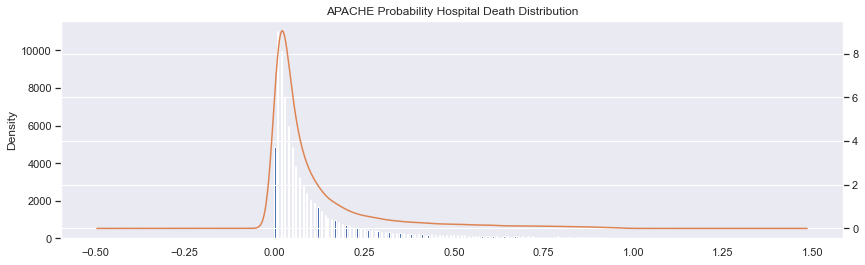

In [32]:
ax = target_1.plot(kind='hist', bins=number_of_bins_1, title='APACHE Probability Hospital Death Distribution', figsize=(14, 4));
target_1.plot(kind='kde', ax=ax, secondary_y=True);

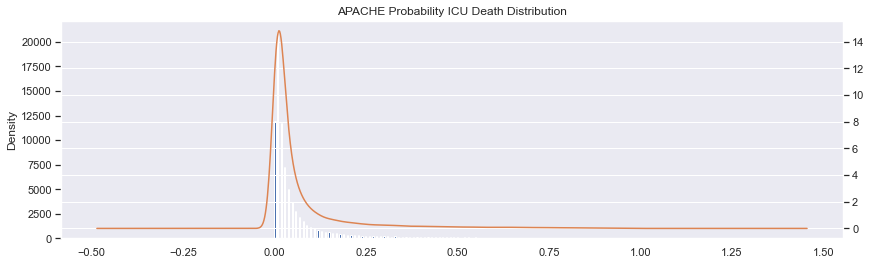

In [33]:
ax = target_2.plot(kind='hist', bins=number_of_bins_2, title='APACHE Probability ICU Death Distribution', figsize=(14, 4));
target_2.plot(kind='kde', ax=ax, secondary_y=True);

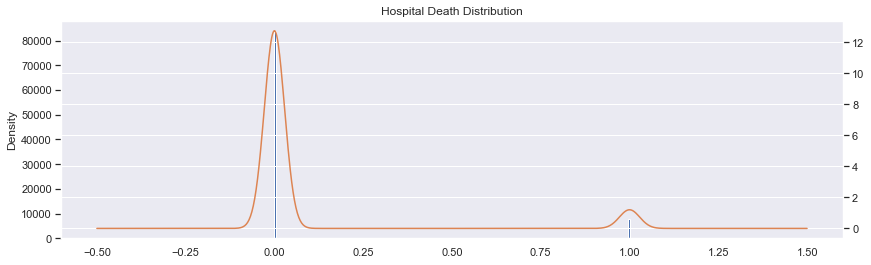

In [34]:
ax = target_3.plot(kind='hist', bins=number_of_bins_3, title='Hospital Death Distribution', figsize=(14, 4));
target_3.plot(kind='kde', ax=ax, secondary_y=True);

It would appear both potential APACHE target variables are biased towards patients with good survival chance (i.e., patients that score low on the APACHE IV framework). By looking at the plots, for both distributions more than 80% of the data is favoured towards patients with less than 25% chance of mortality for both the ICU and Hospital variants.

This skew is even worse for the actual deaths target variable, where over 88% of the data represents patients that survived. This would result in a modelthat is very good at classifying surviving patients but not patients that would pass away.

### 3.1.2. Demographic Bias

#### 3.1.2.1. Ethnicity

In [35]:
ethnicity = medical_data['ethnicity']

In [36]:
ethnicity.isnull().sum()

1395

In [37]:
ethnicity = ethnicity.dropna()

In [38]:
len(ethnicity)

90318

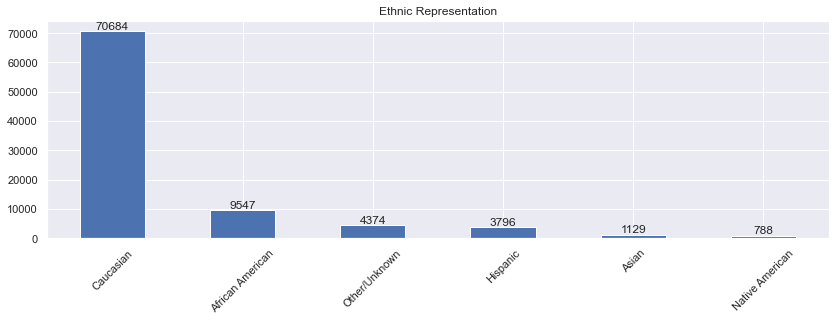

In [39]:
ax = ethnicity.value_counts().plot(kind='bar', title='Ethnic Representation', figsize=(14,4), rot=45)
ax.bar_label(ax.containers[0]);

Caucasian patients account for over 78% of the patient data, meaning that any resulting models will be biased in favour of Caucasians. The next largest ethnicity is African Americans, which accounts for just over 10% of the patient data. Other ethnicities such as Hispanic, Asian or Native American are all less than 5% of the data.

#### 3.1.2.2. Age

In [40]:
age = medical_data['age']

In [41]:
age.isnull().sum()

4228

In [42]:
age = age.dropna()

In [43]:
len(age)

87485

In [44]:
# Calculate appropriate bin size for histogram plot, based on length of the age variable

number_of_bins_age = int(np.ceil(np.sqrt(len(age))))

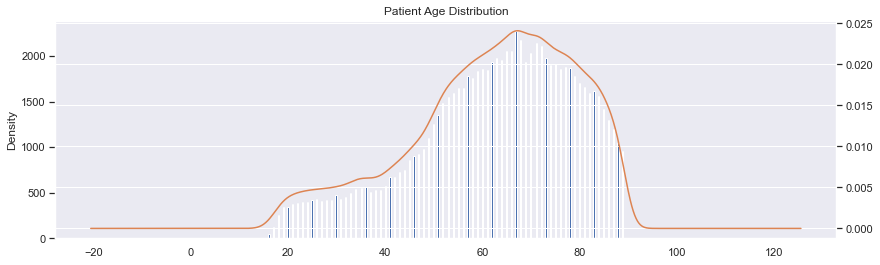

In [45]:
ax = age.plot(kind='hist', bins=number_of_bins_age, title='Patient Age Distribution', figsize=(14, 4));
age.plot(kind='kde', ax=ax, secondary_y=True);

In [46]:
mean_age = int(age.mean())
min_age = int(min(age))
max_age = int(max(age))

print(f"Mean age: {mean_age}")
print(f"Min age: {min_age}")
print(f"Max age: {max_age}")

Mean age: 62
Min age: 16
Max age: 89


The data is skewed towards middle aged adults and the elderly. The youngest patient is 16, while the oldest is 89. The mean age for this distribution is 62 years old. Given that most severe medical ailments occur within individuals who are older, this makes sense.

#### 3.1.2.3. Gender

In [47]:
gender = medical_data['gender']

In [48]:
gender.isnull().sum()

25

In [49]:
gender = gender.dropna()

In [50]:
len(gender)

91688

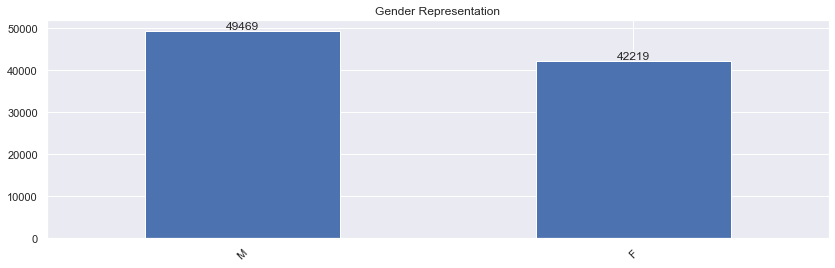

In [51]:
ax = gender.value_counts().plot(kind='bar', title='Gender Representation', figsize=(14,4), rot=45)
ax.bar_label(ax.containers[0]);

A relatively even spread between males and females are represented in the data, with males accounting for around 54% and females making up the balance. This is good as it means that there is no significant bias between genders for this data.

### 3.1.3. Comorbidity Diseases 

In [52]:
# Obtain all the APACHE comorbidity disease names

diseases = medical_dictionary[medical_dictionary['Category'] == 'APACHE comorbidity']['Variable Name'].values

In [53]:
disease_subset = medical_data[diseases]
disease_subset.head()

,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
disease_subset.isnull().sum()

aids                           715
cirrhosis                      715
diabetes_mellitus              715
hepatic_failure                715
immunosuppression              715
leukemia                       715
lymphoma                       715
solid_tumor_with_metastasis    715
dtype: int64

In [55]:
disease_subset = disease_subset.dropna()

In [56]:
len(disease_subset)

90998

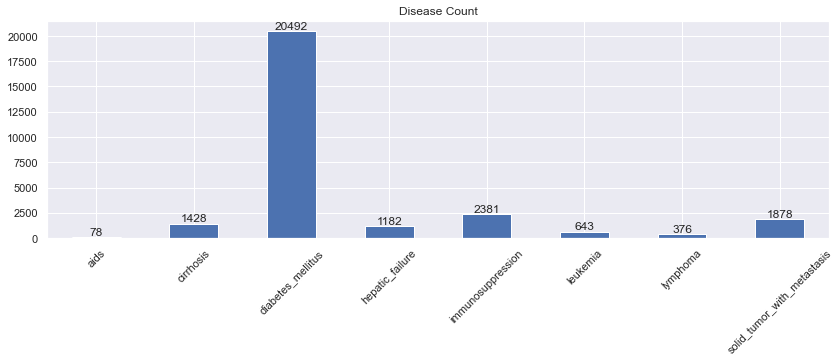

In [57]:
ax = disease_subset.sum().plot(kind='bar', title='Disease Count', figsize=(14, 4), rot=45)
ax.bar_label(ax.containers[0]);

It would appear that diabetes mellitus is the most common disease found in admitted patients (22%), with aids being the least common (0.08%). The other diseases fall rather low in terms of commonality, with immunosuppression being the next most common disease and accounting for 2.6%. It would appear that the other patients admitted do not have any of these severe diseases during their hospital stay.

### 3.1.4. Low Survivability Metrics 

In [58]:
# Isolate low survivability patients (< 50%)

low_survival_prob = medical_data[(medical_data['apache_4a_hospital_death_prob'] > 0.5) | 
                                 (medical_data['apache_4a_icu_death_prob'] > 0.5)]

print(low_survival_prob.shape)
low_survival_prob.head()

(4130, 186)


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
25,29208,114628,118,1,68.0,26.010703,0,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
46,40903,55564,118,1,64.0,16.980389,0,Caucasian,M,180.3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,Neurological,Neurologic
47,73237,1755,151,0,59.0,14.844926,0,African American,F,170.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Respiratory,Respiratory
64,16748,49958,118,0,59.0,27.109238,0,Caucasian,M,177.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
73,75834,43161,118,1,74.0,25.311715,0,Caucasian,M,167.6,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,Hematological,Haematologic


In [59]:
# Obtain all the labs, vitals, APACHE covariate names

labs = medical_dictionary[(medical_dictionary['Category'] == 'labs') | 
                          (medical_dictionary['Category'] == 'labs blood gas')]['Variable Name'].values
vitals = medical_dictionary[medical_dictionary['Category'] == 'vitals']['Variable Name'].values
covariates = medical_dictionary[medical_dictionary['Category'] == 'APACHE covariate']['Variable Name'].values

In [60]:
# Function to find mean, min and max values

def mean_min_max(list_of_columns):
    '''
    Obtains the mean, min, and max values for a given list of columns in a dataframe.
    
    Inputs: list of strings, names of columns
    
    Returns: dictionary, column keys with list of means, mins, and maxes for each column supplied 
    '''
    dictionary = {}
    df = medical_data.copy()
    
    for column in list_of_columns:
        df[column] = df[column].dropna()
        dictionary[column] = [df[column].mean(), df[column].min(), df[column].max()]
    
    return dictionary

In [61]:
# Dictionaries with metrics

labs_metrics = mean_min_max(labs)
vitals_metrics = mean_min_max(vitals)
covariate_metrics = mean_min_max(covariates)

In [62]:
# Create Dataframes to hold information

labs_df = pd.DataFrame(labs_metrics, index=['mean', 'min', 'max'])
vitals_df = pd.DataFrame(vitals_metrics, index=['mean', 'min', 'max'])
covariates_df = pd.DataFrame(covariate_metrics, index=['mean', 'min', 'max'])

#### 3.1.4.1. Labs Metrics 

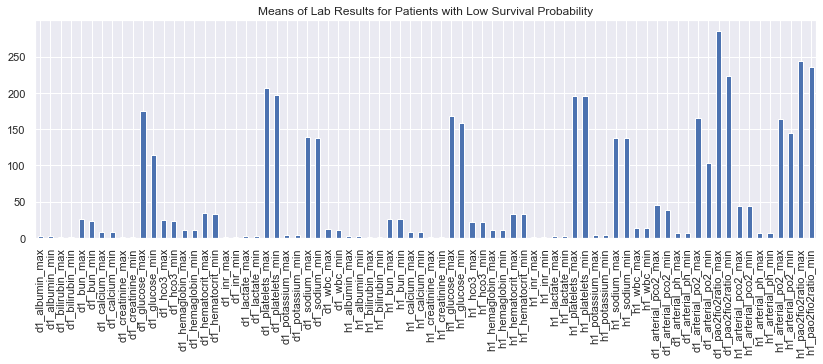

In [63]:
labs_df.iloc[0].plot(kind='bar', title='Means of Lab Results for Patients with Low Survival Probability', figsize=(14,4));

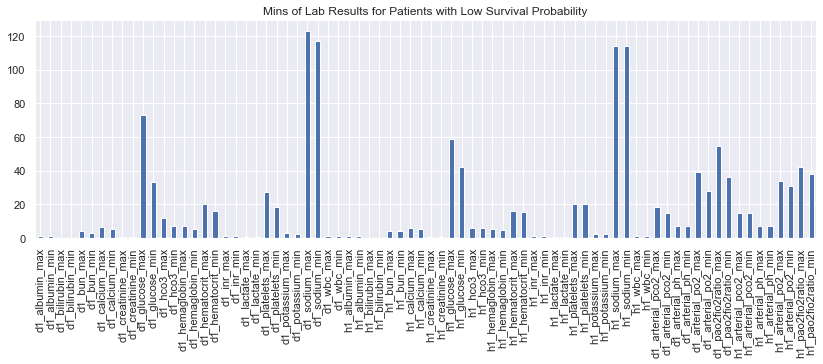

In [64]:
labs_df.iloc[1].plot(kind='bar', title='Mins of Lab Results for Patients with Low Survival Probability', figsize=(14,4));

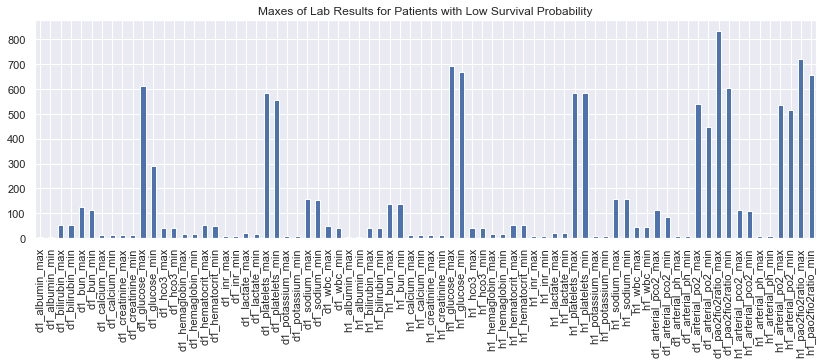

In [65]:
labs_df.iloc[2].plot(kind='bar', title='Maxes of Lab Results for Patients with Low Survival Probability', figsize=(14,4));

#### 3.1.4.2. Vitals Metrics 

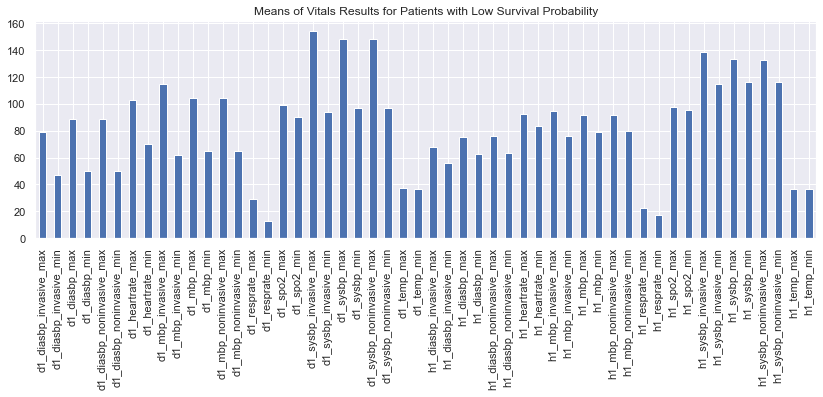

In [66]:
vitals_df.iloc[0].plot(kind='bar', title='Means of Vitals Results for Patients with Low Survival Probability', figsize=(14,4));

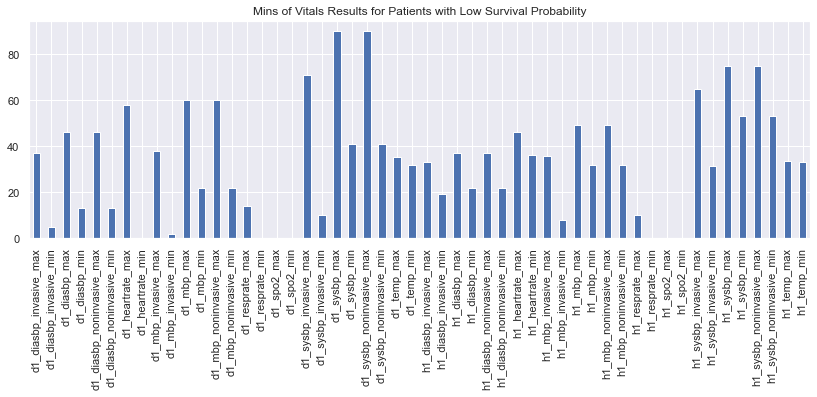

In [67]:
vitals_df.iloc[1].plot(kind='bar', title='Mins of Vitals Results for Patients with Low Survival Probability', figsize=(14,4));

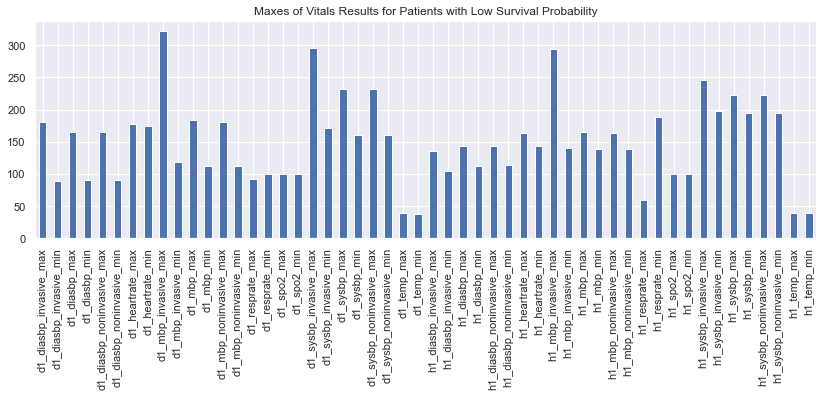

In [68]:
vitals_df.iloc[2].plot(kind='bar', title='Maxes of Vitals Results for Patients with Low Survival Probability', figsize=(14,4));

#### 3.1.4.3. Covariates Metrics 

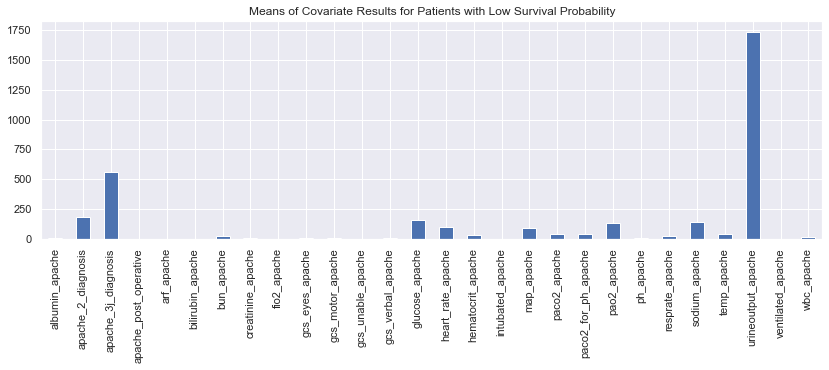

In [69]:
covariates_df.iloc[0].plot(kind='bar', title='Means of Covariate Results for Patients with Low Survival Probability', figsize=(14,4));

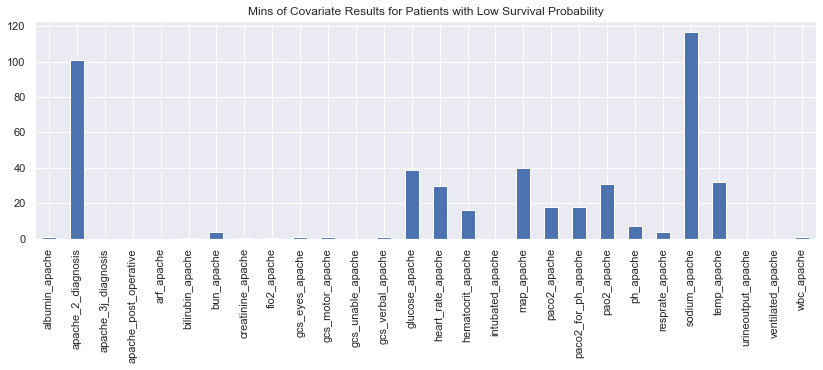

In [70]:
covariates_df.iloc[1].plot(kind='bar', title='Mins of Covariate Results for Patients with Low Survival Probability', figsize=(14,4));

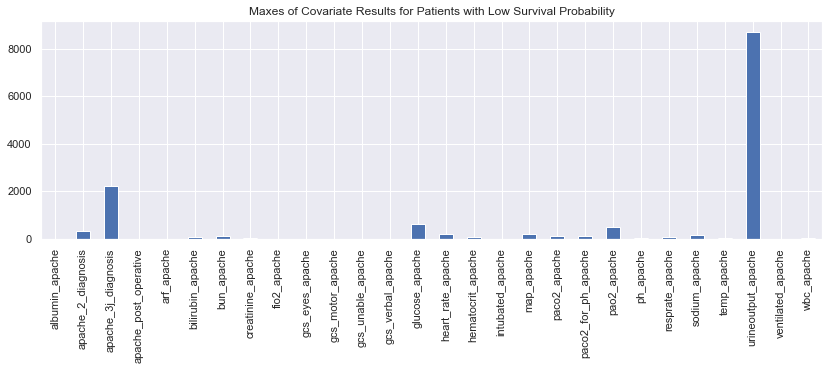

In [71]:
covariates_df.iloc[2].plot(kind='bar', title='Maxes of Covariate Results for Patients with Low Survival Probability', figsize=(14,4));

With the above plots established, any produced results can be cross referenced with the respective bar graphs to find any constistencies within the patient metric values - a useful tool.

### 3.1.5. Null Columns and Strategy

In section 2.2, it was established that there are quite a few columns which contain excessive amounts of null values. A strategy needs to be determined for how best to deal with these missing values.

#### 3.1.5.1. Columns with less than 5% missing values

In [72]:
medical_data.shape[0]

91713

In [73]:
min_threshold = np.round(medical_data.shape[0] * 0.05)
min_threshold

4586.0

A list of columns will now be obtained which contain less than 4586 missing values.

In [74]:
mostly_full_columns = [col for col in medical_data.columns if medical_data[col].isnull().sum() <= min_threshold]

In [75]:
# See which categories are included in this list

low_null_categories = [medical_dictionary[medical_dictionary['Variable Name'] == name]['Category'].values[0] for name in mostly_full_columns]

In [76]:
from collections import Counter

low_null_data = Counter(low_null_categories)

In [77]:
# Use Dataframe to store information

low_null_cat_df = pd.DataFrame(low_null_data, index=[0])

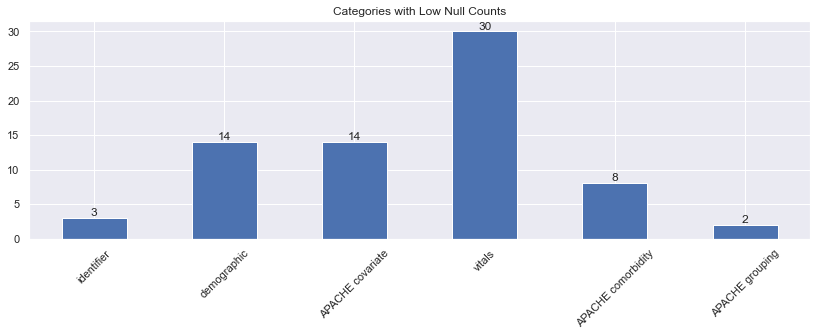

In [78]:
# Plot data

ax = low_null_cat_df.sum().plot(kind='bar', title='Categories with Low Null Counts', figsize=(14, 4), rot=45);
ax.bar_label(ax.containers[0]);

In [79]:
mostly_full_columns

['encounter_id',
 'patient_id',
 'hospital_id',
 'hospital_death',
 'age',
 'bmi',
 'elective_surgery',
 'ethnicity',
 'gender',
 'height',
 'icu_admit_source',
 'icu_id',
 'icu_stay_type',
 'icu_type',
 'pre_icu_los_days',
 'readmission_status',
 'weight',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'heart_rate_apache',
 'intubated_apache',
 'map_apache',
 'resprate_apache',
 'temp_apache',
 'ventilated_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',

The major categories which might be included in any model development include the APACHE covariate, APACHE comorbidity, and vitals categories, as well as a few items in the demographic category. It would seem that many of these will be useable with only minor losses by dropping or imputing whatever missing values exist (based on the nature of the column).

#### 3.1.5.2. Columns with less than 20% filled values

In [80]:
medical_data.shape[0]

91713

In [81]:
max_threshold = np.round(medical_data.shape[0] * 0.8)
max_threshold

73370.0

A list of columns will now be obtained which contain more than 73370 missing values. These columns will most likely be dropped due to lack of data.

In [82]:
mostly_empty_columns = [col for col in medical_data.columns if medical_data[col].isnull().sum() >= max_threshold]

In [83]:
# See which categories are included in this list

high_null_categories = [medical_dictionary[medical_dictionary['Variable Name'] == name]['Category'].values[0] for name in mostly_empty_columns]

In [84]:
high_null_data = Counter(high_null_categories)

In [85]:
# Use Dataframe to store information

high_null_cat_df = pd.DataFrame(high_null_data, index=[0])

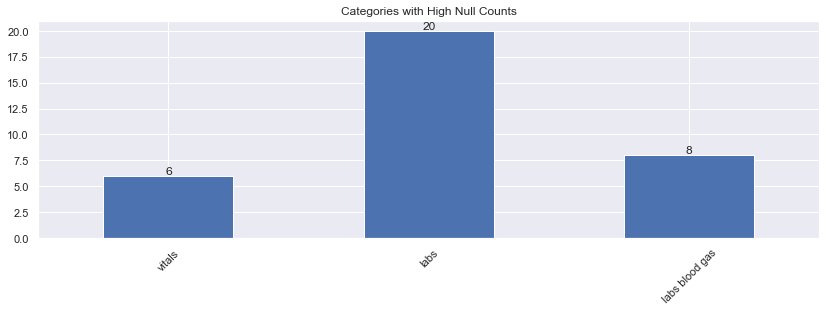

In [86]:
# Plot data

ax = high_null_cat_df.sum().plot(kind='bar', title='Categories with High Null Counts', figsize=(14, 4), rot=45);
ax.bar_label(ax.containers[0]);

In [87]:
mostly_empty_columns

['h1_diasbp_invasive_max',
 'h1_diasbp_invasive_min',
 'h1_mbp_invasive_max',
 'h1_mbp_invasive_min',
 'h1_sysbp_invasive_max',
 'h1_sysbp_invasive_min',
 'h1_albumin_max',
 'h1_albumin_min',
 'h1_bilirubin_max',
 'h1_bilirubin_min',
 'h1_bun_max',
 'h1_bun_min',
 'h1_calcium_max',
 'h1_calcium_min',
 'h1_creatinine_max',
 'h1_creatinine_min',
 'h1_hco3_max',
 'h1_hco3_min',
 'h1_hematocrit_max',
 'h1_hematocrit_min',
 'h1_lactate_max',
 'h1_lactate_min',
 'h1_platelets_max',
 'h1_platelets_min',
 'h1_wbc_max',
 'h1_wbc_min',
 'h1_arterial_pco2_max',
 'h1_arterial_pco2_min',
 'h1_arterial_ph_max',
 'h1_arterial_ph_min',
 'h1_arterial_po2_max',
 'h1_arterial_po2_min',
 'h1_pao2fio2ratio_max',
 'h1_pao2fio2ratio_min']

Unfortunately a high number of vitals and labs categories are affected by a high null count. These columns will most likely be useless during model development.

#### 3.1.5.3. Columns with more than than 50% missing values

The final nulls check is for columns that are missing more than 50% of their values. If these columns are not worth imputing with regards to model development and feature generation, they will be removed.

In [88]:
medical_data.shape[0]

91713

In [89]:
threshold = np.round(medical_data.shape[0] * 0.50)
threshold

45856.0

A list of columns will now be obtained which contain more than 45856 missing values.

In [90]:
empty_columns_50_percent = [col for col in medical_data.columns if medical_data[col].isnull().sum() >= threshold]

In [91]:
# See which categories are included in this list

null_categories_50_percent = [medical_dictionary[medical_dictionary['Variable Name'] == name]['Category'].values[0] for name in empty_columns_50_percent]

In [92]:
null_data_50_percent = Counter(null_categories_50_percent)

In [93]:
# Use Dataframe to store information

high_null_50_cat_df = pd.DataFrame(null_data_50_percent, index=[0])

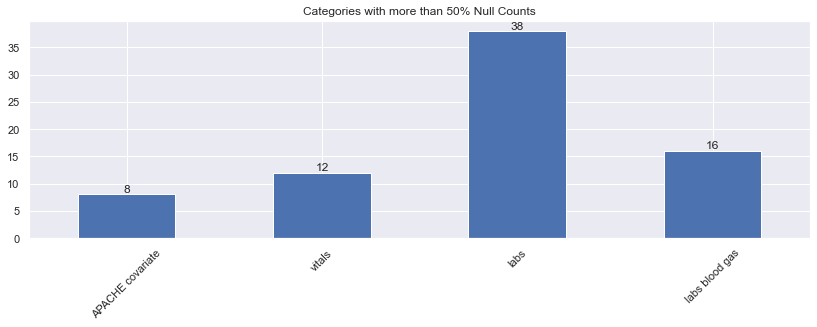

In [94]:
# Plot data

ax = high_null_50_cat_df.sum().plot(kind='bar', title='Categories with more than 50% Null Counts', figsize=(14, 4), rot=45);
ax.bar_label(ax.containers[0]);

Unfortunately quite a few categories are affected by columns missing more than 50% of their values. Depending on the structure of the modeling process, some of these values may need to be imputed otherwise they will have to be removed. 

Ideally, variables which are normally distributed could be imputed.

In [95]:
empty_columns_50_percent

['albumin_apache',
 'bilirubin_apache',
 'fio2_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'urineoutput_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_mbp_invasive_max',
 'd1_mbp_invasive_min',
 'd1_sysbp_invasive_max',
 'd1_sysbp_invasive_min',
 'h1_diasbp_invasive_max',
 'h1_diasbp_invasive_min',
 'h1_mbp_invasive_max',
 'h1_mbp_invasive_min',
 'h1_sysbp_invasive_max',
 'h1_sysbp_invasive_min',
 'd1_albumin_max',
 'd1_albumin_min',
 'd1_bilirubin_max',
 'd1_bilirubin_min',
 'd1_inr_max',
 'd1_inr_min',
 'd1_lactate_max',
 'd1_lactate_min',
 'h1_albumin_max',
 'h1_albumin_min',
 'h1_bilirubin_max',
 'h1_bilirubin_min',
 'h1_bun_max',
 'h1_bun_min',
 'h1_calcium_max',
 'h1_calcium_min',
 'h1_creatinine_max',
 'h1_creatinine_min',
 'h1_glucose_max',
 'h1_glucose_min',
 'h1_hco3_max',
 'h1_hco3_min',
 'h1_hemaglobin_max',
 'h1_hemaglobin_min',
 'h1_hematocrit_max',
 'h1_hematocrit_min',
 'h1_inr_max',
 'h1_inr_min',
 'h1_lactate_m

## 3.2. Data Profile

The previous section dealt with specific questions surrounding the dataset and the medical nature of the data. This section is concerned with establishing which columns will be effective in machine learning applications. Based on the results, a problem statement will be created. Data preparation and cleaning required to fulfill the problem statement will take place in the next section.

First, remove columns that will not be helpful such as identifier columns, demographic columns, APACHE Grouping columns, and columns with high null values.

In [96]:
# Make a function to drop columns

def drop_columns(df, column_list):
    '''
    Remove specified columns from a dataframe.
    
    Inputs:
    
    df: dataframe, dataset from which to remove specified columns.
    column_list: list of strings, column names to be dropped.
    
    Returns: dataframe with updated columns.
    '''
    
    df = df.drop(columns=column_list, axis=1)
    
    return df

In [97]:
medical_data.shape

(91713, 186)

In [98]:
# Make a copy of the medical data dataset for data profile generation purposes.

medical_profile_df = medical_data.copy()

In [99]:
identifier_columns = ['patient_id', 'hospital_id', 'encounter_id']
demographic_columns = ['elective_surgery', 'ethnicity', 'gender', 'height', 'icu_type','pre_icu_los_days',
                       'icu_admit_source', 'icu_id', 'icu_stay_type', 'hospital_admit_source', 'weight']
grouping_columns = ['apache_3j_bodysystem', 'apache_2_bodysystem']

In [100]:
# update this with drop columns function

medical_profile_df = drop_columns(medical_profile_df, mostly_empty_columns)
medical_profile_df = drop_columns(medical_profile_df, identifier_columns)
medical_profile_df = drop_columns(medical_profile_df, demographic_columns)
medical_profile_df = drop_columns(medical_profile_df, grouping_columns)

In [101]:
medical_profile_df.shape

(91713, 136)

By using the pandas_profiling library, a succinct and clear report on the data can be generated, which will be used to establish the cleaning and modeling process in later sections. For more information on pandas_profiling, please refer to this [article](https://towardsdatascience.com/pandas-profiling-and-exploratory-data-analysis-with-line-one-of-code-423111991e58).

In [102]:
from pandas_profiling import ProfileReport
import warnings

warnings.simplefilter('ignore')  # mute potential warnings

In [103]:
# Create Data profile

# profile = ProfileReport(medical_profile_df, title='Medical Data Report')

# Export generated profile to html

# profile.to_file(output_file='medical_data_profile.html')


# Please note that the generation and opening of this report requires an enormous amount of memory.

### 3.2.1. Data Profile Findings

The generated profile report (medical_data_profile.html in the root folder) revealed many useful insights for the data, and strategies on how best to apply the columns (each of which is a potential feature) will be discussed below. Please take note that due to the computational requirements of the profile report, certain features (previously deemed unimportant) were removed from the data for the generation step.  

#### 3.2.1.1. Target Variables

In the previous sections, it was determined that there are three potential target variables for a machine learning application:

1. Hospital Death (whether the patient actually died during their hospital stay)
2. APACHE IV Hospital Mortality Probability (an APACHE score for chance of patient death in the hospital)
3. APACHE IV ICU Mortality Probability (an APACHE score for chance of patient death in the ICU)

The first of these variables is a binary classification problem, where any logistic regression or classification algorithm would suffice. The data for this variable itself is also fully present with no null values, however suffers from extreme skewness towards patients that survive (88% of the data is one class (survival) where the remaining 12% is the other class (death)). This variable could benefit from [SMOTE](https://towardsdatascience.com/machine-learning-target-feature-label-imbalance-problem-and-solutions-98c5ae89ad0) (Synthetic Minority Oversampling Technique), to balance out the undersampled target label. Please note that SMOTE is only applied to the training dataset, after the train_test_split has been performed.

The remaining target variables are regression problems, where the predicted output would be a probability that a patient passes away during their stay at the hospital or within the ICU unit respectively. The data points themselves also require cleaning, with many values being represented as -1 (which does not make any sense regarding probabilities). Both these distributions are skewed heavily to the right, as shown in the previous section. This is because like the first target variable, they are biased towards patients with high survivability.

#### 3.2.1.2. General Variable Discussion and Feature Engineering

Most of the variables are useable, and normally distributed (or at least very close to being normally distributed). There are the odd exceptions where a variable has only a single value (such as readmission_status) and in this case the feature will have to be dropped altogether in order to ensure effective model training.

Some variables such as patient BMI have missing values that can be calculated by using information provided by other variables. As an example, patient BMI can be calculated by using the patient's height and weight information. These kinds of features will be useful inclusions in any model development.

Two variables in particular (paco2_apache and paco2_for_ph_apache) are suspiciously similar in terms of distribution and value structure. These two columns will be compared further down and if deemed to be identical, one of them should be dropped if used in model development. The group of APACHE comorbidty variables are also deemed useful, as they represent severe diseases that would ultimately affect the potential outcome of the patient.

There are numerous variables (particularly in the labs and vitals categories) which contain a high number of missing values (greater than 55%). Even for the variables that are normally (or otherwise) distributed, it would be undesirable to impute such a large number of values. In this instance, it is fortunate that the dataset is comprehensive enough to provide many metrics of what is essentially the same measurement. For example, the APACHE covariate score variables (classified under the APACHE covariate category) are often highly correlated with measurements of the same name under the labs and vitals categories. What this means is that if the labs or vitals category measurement for heartrate is missing many of its values, it is feasible to use the APACHE score for heartrate instead, as it is missing very few values and still representing the same information. This is a huge benefit to the model development stage of this project, as the correlation coefficients of variables (generated in the profile report) can be referenced to determine if a variable can simply be replaced by a more robust, correlated alternative. For more information on this, please refer to this [article](https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4).

Features in particular that need to be discussed further are the diagnosis features (apache_3j_bodysystem, apache_2_bodysystem, apache_3j_diagnosis, and apache_3j_diagnosis). These features characterize the diagnosis the patients received upon their admittance into the hospital. While it is a useful piece of information to have, there is a risk that a model might prioritize diagnoses instead of the physical characteristics of each APACHE measurement when assessing a patient's hospital outcome. While certain diagnoses are more severe than others, miracle recoveries do occur and any such bias as a result of diagnosis should be excluded as much as possible.

#### 3.2.1.3. Null Value Strategy

For variables which cannot be replaced via correlation as described above another strategy needs to be implemented in order to deal with missing values. The report showed that there are many important variables (such as creatinine measurements etc) that are missing a small percentage of their values. If no correlated alternative is deemed suitable, the distribution of these variables shall be determined (normal, Bernoulli, etc) and the values imputed accordingly (most likely via MICE). If this is not an option, careful consideration will take place as to the variables ultimate importance to the target, and the null values simply dropped if suitable.

For more information and detailed data exploration on each of the above topics, please refer to the generated profile report.

#### 3.2.1.4. APACHE Covariate Correlation

In [104]:
# Obtain all APACHE covariate columns, remove diagnosis columns

apache_columns = list(medical_dictionary[medical_dictionary['Category'] == 'APACHE covariate']['Variable Name'].values)
diagnosis = ['apache_2_diagnosis', 'apache_3j_diagnosis']

apache_columns_cleaned = [item for item in apache_columns if item not in diagnosis]

In [105]:
# Create APACHE correlation dataset

apache_subset = medical_data[apache_columns_cleaned]

In [106]:
# Create Correlation dataframe

apache_corr = apache_subset.corr()

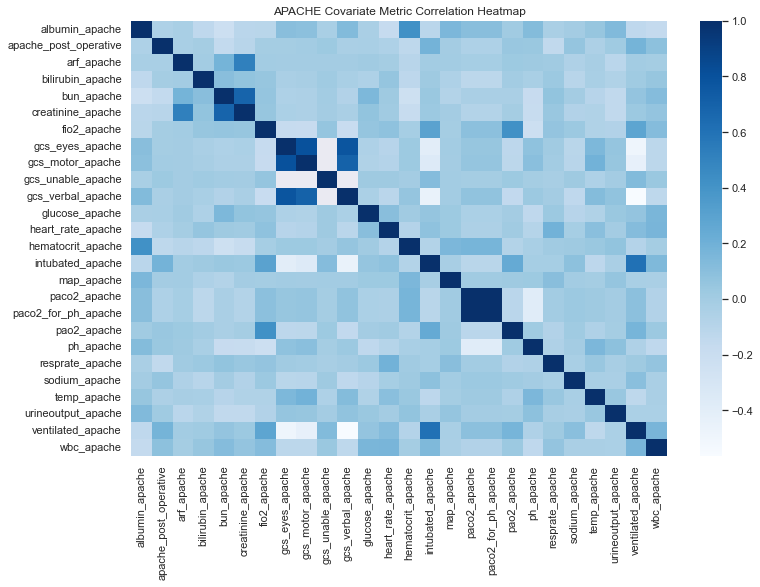

In [107]:
figure = plt.figure(figsize=(12, 8))
plt.title('APACHE Covariate Metric Correlation Heatmap')

sns.heatmap(apache_corr,cmap='Blues');

Very few of the features are correlated, with the exception of the paco2_apache and paco2_for_ph_apache features. Based on the profile report, there is reason to believe that these columns are in fact identical based on minimum values, missing values, and overall distribution. This will be tested below.

In [108]:
# Test for identical columns 

apache_subset['paco2_apache'].equals(apache_subset['paco2_for_ph_apache'])

True

The 'True' result indicates that these columns are indeed identical and hence only one should be used.

## 3.3. Problem Statement

How effectively do different machine learning models predict the survival outcome of a patient in the hospital, based on particular metrics that characterize the patient?
The metrics in question include demographic, APACHE covariate, and any labs and vitals not characterized by the APACHE covariate metrics.

It is with this requirement in mind that the following sections are conducted.

### 3.3.1 Feature Structure

The **target** variable will be: 

1. hospital death. 

Thus, this machine learning problem is a **binary classification** problem.

The initial **feature** variables will be the APACHE covariate variables, alongside a few demographic variables:

1. albumin_apache
2. apache_post_operative
3. arf_apache
4. bilirubin_apache
5. bun_apache
6. creatinine_apache
7. fio2_apache
8. gcs_eyes_apache
9. gcs_motor_apache
10. gcs_unable_apache
11. gcs_verbal_apache
12. glucose_apache
13. heart_rate_apache
14. hematocrit_apache
15. intubated_apache
16. map_apache
17. paco2_apache
18. paco2_for_ph_apache
19. pao2_apache
20. ph_apache
21. resprate_apache
22. sodium_apache
23. temp_apache
24. urineoutput_apache
25. ventilated_apache
26. wbc_apache
27. aids
28. cirrhosis
29. diabetes_mellitus
30. hepatic_failure
31. immunosuppression
32. leukemia
33. lymphoma
34. solid_tumor_with_metastasis
35. elective_surgery
36. bmi
37. height (feature engineering)
38. weight (feature engineering)


These features require further scrutiny, analysis, and cleaning before being included in the final dataset used for training. This will be conducted in the next section

# 4. Data Cleaning and Preparation

In [109]:
# Establish initial dataset and required steps for cleaning and prep.

print(medical_data.shape)
medical_data.head()

(91713, 186)


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [110]:
# Obtain dataframe of initial target and feature variables

initial_target_and_features = ['hospital_death', 'albumin_apache', 'apache_post_operative', 'arf_apache', 'bilirubin_apache',
                               'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
                               'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 
                               'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache',
                               'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 
                               'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'aids', 'cirrhosis', 'diabetes_mellitus',
                               'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis',
                               'elective_surgery', 'bmi', 'height', 'weight']

medical_unclean = medical_data.copy()
medical_unclean = medical_data[initial_target_and_features]

In [111]:
print(medical_unclean.shape)
medical_unclean.head()

(91713, 39)


,hospital_death,albumin_apache,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,elective_surgery,bmi,height,weight
0,0,2.3,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0,22.73,180.3,73.9
1,0,NaN,0,0.0,NaN,9.0,0.56,1.0,1.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0,27.42,160.0,70.2
2,0,NaN,0,0.0,NaN,NaN,NaN,NaN,3.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,31.95,172.7,95.3
3,0,NaN,1,0.0,NaN,NaN,NaN,0.6,4.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,22.64,165.1,61.7
4,0,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,188.0,NaN


In [112]:
# Brief look at initial statistics

medical_unclean.describe()

,hospital_death,albumin_apache,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,elective_surgery,bmi,height,weight
count,91713.000000,37334.000000,91713.000000,90998.000000,33579.000000,72451.00000,72860.000000,20845.000000,89812.000000,89812.000000,...,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,91713.000000,88284.000000,90379.000000,88993.000000
mean,0.086302,2.902968,0.201106,0.027979,1.147721,25.82533,1.480014,0.595751,3.465049,5.471195,...,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,0.183736,29.185818,169.641588,84.028340
std,0.280811,0.681863,0.400829,0.164912,2.165538,20.67298,1.525787,0.263238,0.951715,1.288376,...,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,0.387271,8.275142,10.795378,25.011497
min,0.000000,1.200000,0.000000,0.000000,0.100000,4.00000,0.300000,0.210000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.844926,137.200000,38.600000
25%,0.000000,2.400000,0.000000,0.000000,0.400000,13.00000,0.720000,0.400000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.641975,162.500000,66.800000
50%,0.000000,2.900000,0.000000,0.000000,0.600000,19.00000,0.980000,0.500000,4.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.654655,170.100000,80.300000
75%,0.000000,3.400000,0.000000,0.000000,1.100000,32.00000,1.530000,0.850000,4.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.930206,177.800000,97.100000
max,1.000000,4.600000,1.000000,1.000000,51.000000,127.00000,11.180000,1.000000,4.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,67.814990,195.590000,186.000000


## 4.1. Drop Features

Any features which have too many missing values, only a single value, or are duplicate columns will be dropped first. The verdict of which features appear here are a result of data profile report analysis.

In [113]:
# drop list with undesirable columns, determined through profile report

drop_list = ['arf_apache', 'bilirubin_apache', 'fio2_apache', 'gcs_unable_apache', 'paco2_for_ph_apache']

In [114]:
medical_dropped = drop_columns(medical_unclean, drop_list)

In [115]:
# Find columns with more than 50% missing values, these columns will be dropped.

unusable_columns = []

for col in medical_dropped.columns:
    if col in empty_columns_50_percent:
        unusable_columns.append(col)
        
unusable_columns

['albumin_apache',
 'paco2_apache',
 'pao2_apache',
 'ph_apache',
 'urineoutput_apache']

In [116]:
medical_dropped = drop_columns(medical_dropped, unusable_columns)

In [117]:
medical_dropped.describe()

,hospital_death,apache_post_operative,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,elective_surgery,bmi,height,weight
count,91713.000000,91713.000000,72451.00000,72860.000000,89812.000000,89812.000000,89812.000000,80677.000000,90835.000000,71835.000000,...,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,91713.000000,88284.000000,90379.000000,88993.000000
mean,0.086302,0.201106,25.82533,1.480014,3.465049,5.471195,3.994778,160.326822,99.707932,32.988739,...,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,0.183736,29.185818,169.641588,84.028340
std,0.280811,0.400829,20.67298,1.525787,0.951715,1.288376,1.560166,90.790551,30.870502,6.873585,...,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,0.387271,8.275142,10.795378,25.011497
min,0.000000,0.000000,4.00000,0.300000,1.000000,1.000000,1.000000,39.000000,30.000000,16.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.844926,137.200000,38.600000
25%,0.000000,0.000000,13.00000,0.720000,3.000000,6.000000,4.000000,97.000000,86.000000,28.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.641975,162.500000,66.800000
50%,0.000000,0.000000,19.00000,0.980000,4.000000,6.000000,5.000000,133.000000,104.000000,33.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.654655,170.100000,80.300000
75%,0.000000,0.000000,32.00000,1.530000,4.000000,6.000000,5.000000,196.000000,120.000000,37.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.930206,177.800000,97.100000
max,1.000000,1.000000,127.00000,11.180000,4.000000,6.000000,5.000000,598.700000,178.000000,51.400000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,67.814990,195.590000,186.000000


## 4.2. Feature Engineering

The missing BMI values can be calculated by dividing weight by height (in m) squared according to this [formula](https://www.cdc.gov/nccdphp/dnpao/growthcharts/training/bmiage/page5_1.html#:~:text=With%20the%20metric%20system%2C%20the,by%2010%2C000%2C%20can%20be%20used.).

This calculation should only be performed on missing bmi values, and the height and weight columns can be removed after the calculation is complete.

In [118]:
# Convert height column to correct format (cm -> m)

medical_dropped['height'] = medical_dropped['height'] / 100

In [119]:
# Find rows where feature engineering would be appropriate

medical_dropped[(medical_dropped['bmi'].isnull()) & (medical_dropped['height'].isnull() == False) & 
                (medical_dropped['weight'].isnull() == False)]

,hospital_death,apache_post_operative,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,elective_surgery,bmi,height,weight


It would appear that all rows where the bmi value is missing do not have sufficient data in the weight and height columns to perform any effective feature engineering. The weight and height columns can therefore be dropped.

In [120]:
# Remove feature engineering columns

feature_engineering_cols = ['weight', 'height']

medical_dropped = drop_columns(medical_dropped, feature_engineering_cols)

In [121]:
medical_dropped.describe()

,hospital_death,apache_post_operative,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,elective_surgery,bmi
count,91713.000000,91713.000000,72451.00000,72860.000000,89812.000000,89812.000000,89812.000000,80677.000000,90835.000000,71835.000000,...,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,91713.000000,88284.000000
mean,0.086302,0.201106,25.82533,1.480014,3.465049,5.471195,3.994778,160.326822,99.707932,32.988739,...,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,0.183736,29.185818
std,0.280811,0.400829,20.67298,1.525787,0.951715,1.288376,1.560166,90.790551,30.870502,6.873585,...,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,0.387271,8.275142
min,0.000000,0.000000,4.00000,0.300000,1.000000,1.000000,1.000000,39.000000,30.000000,16.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.844926
25%,0.000000,0.000000,13.00000,0.720000,3.000000,6.000000,4.000000,97.000000,86.000000,28.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.641975
50%,0.000000,0.000000,19.00000,0.980000,4.000000,6.000000,5.000000,133.000000,104.000000,33.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.654655
75%,0.000000,0.000000,32.00000,1.530000,4.000000,6.000000,5.000000,196.000000,120.000000,37.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.930206
max,1.000000,1.000000,127.00000,11.180000,4.000000,6.000000,5.000000,598.700000,178.000000,51.400000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,67.814990


## 4.3. Null Values

The remaining features need to have their null values dealt with. Given that there are numerical and binary features, a broad based approach should be taken. The numerical columns are also not all uniformly distributed in the same way (i.e. some features are normally distributed, others are skewed etc.) therefore a non-parametric approach should be taken to fill in these missing values.

In [122]:
medical_dropped.isnull().sum()

hospital_death                     0
apache_post_operative              0
bun_apache                     19262
creatinine_apache              18853
gcs_eyes_apache                 1901
gcs_motor_apache                1901
gcs_verbal_apache               1901
glucose_apache                 11036
heart_rate_apache                878
hematocrit_apache              19878
intubated_apache                 715
map_apache                       994
resprate_apache                 1234
sodium_apache                  18600
temp_apache                     4108
ventilated_apache                715
wbc_apache                     22012
aids                             715
cirrhosis                        715
diabetes_mellitus                715
hepatic_failure                  715
immunosuppression                715
leukemia                         715
lymphoma                         715
solid_tumor_with_metastasis      715
elective_surgery                   0
bmi                             3429
d

Only the target variable, elective_surgery and apache_post_operative features do not contain any nulls. The remaining columns need to undergo imputation.

In [123]:
# A small note on the following columns, these are integer values and should be dealt with accordingly. 

print(medical_dropped['gcs_eyes_apache'].unique())
print(medical_dropped['gcs_motor_apache'].unique())
print(medical_dropped['gcs_verbal_apache'].unique())
print(medical_dropped['intubated_apache'].unique())
print(medical_dropped['ventilated_apache'].unique())

[ 3.  1.  4. nan  2.]
[ 6.  3. nan  4.  5.  1.  2.]
[ 4.  1.  5. nan  3.  2.]
[ 0.  1. nan]
[ 0.  1. nan]


### 4.3.1. Intubated, Ventilated, and Comorbidity Columns

Any missing values in these columns will be dealt with via filling with 0s for simplicity.

In [124]:
categorical_cols = ['aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 
                    'lymphoma', 'solid_tumor_with_metastasis', 'intubated_apache', 'ventilated_apache']

In [125]:
# Fill Nans with 0 in comorboditiy columns

for col in categorical_cols:
    medical_dropped[col] = medical_dropped[col].fillna(0)

### 4.3.2. MICE Imputation

By using MICE (Multivariate Imputation by Chained Equation), the missing values in the dataset can be filled in by running a series of regression models. These models impute the missing values sequentially. For more information on how MICE works, please refer to this [article](https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87).

In [126]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

In [127]:
full_cols = ['hospital_death', 'apache_post_operative', 'elective_surgery', 'aids', 'cirrhosis', 'diabetes_mellitus', 
             'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis', 'intubated_apache', 
             'ventilated_apache']

cols_to_impute = [col for col in medical_dropped.columns if col not in full_cols]

In [128]:
# Create dataframe designed for MICE imputation, then commence with imputation

medical_mice = medical_dropped.filter(cols_to_impute, axis=1).copy()

imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), imputation_order='ascending')

In [129]:
medical_imputed = pd.DataFrame(imputer.fit_transform(medical_mice), columns=cols_to_impute)

In [130]:
print(medical_imputed.shape)
medical_imputed.isnull().sum()

(91713, 14)


bun_apache           0
creatinine_apache    0
gcs_eyes_apache      0
gcs_motor_apache     0
gcs_verbal_apache    0
glucose_apache       0
heart_rate_apache    0
hematocrit_apache    0
map_apache           0
resprate_apache      0
sodium_apache        0
temp_apache          0
wbc_apache           0
bmi                  0
dtype: int64

In [131]:
# The above mentioned integer columns (gcs features) need to be floored to be returned to their original scale-like data.

gcs_features = ['gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache']

for col in gcs_features:
    medical_imputed[col] = medical_imputed[col].apply(np.floor)

In [132]:
# Ensure integrity of special columns

print(medical_imputed['gcs_eyes_apache'].unique())
print(medical_imputed['gcs_motor_apache'].unique())
print(medical_imputed['gcs_verbal_apache'].unique())
print(medical_dropped['intubated_apache'].unique())
print(medical_dropped['ventilated_apache'].unique())

[3. 1. 4. 2.]
[6. 3. 5. 4. 1. 2.]
[4. 1. 5. 3. 2.]
[0. 1.]
[0. 1.]


It would appear that the imputation was successful, the dataset has the correct shape and no missing values. In addition, all the columns that were categorical or binary have been kept in their original format, only without the nulls. The filled columns which were removed now need to be re-added.

In [133]:
medical_imputed.describe()

,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,map_apache,resprate_apache,sodium_apache,temp_apache,wbc_apache,bmi
count,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000
mean,25.748093,1.480005,3.454341,5.459739,3.981148,159.808879,99.705692,33.042102,88.016154,25.808424,137.933873,36.414911,12.073745,29.190385
std,18.495508,1.365436,0.945265,1.278520,1.548671,85.326933,30.723629,6.130804,41.806123,15.005974,4.725601,0.815650,6.084887,8.124189
min,4.000000,0.079365,1.000000,1.000000,1.000000,39.000000,30.000000,16.200000,40.000000,4.000000,117.000000,32.100000,0.900000,14.844926
25%,14.000000,0.790000,3.000000,6.000000,3.000000,100.000000,87.000000,29.500000,54.000000,11.000000,136.000000,36.200000,8.349719,23.787760
50%,22.000000,1.180000,4.000000,6.000000,5.000000,144.424484,104.000000,33.210429,67.000000,28.000000,138.000000,36.500000,11.200000,27.910059
75%,29.466360,1.564778,4.000000,6.000000,5.000000,187.000000,120.000000,36.600000,124.000000,36.000000,140.000000,36.700000,14.051152,32.690378
max,127.000000,11.180000,4.000000,6.000000,5.000000,598.700000,178.000000,51.400000,200.000000,60.000000,158.000000,39.700000,45.800000,67.814990


In [134]:
# Re-add removed columns

medical_full = medical_dropped[full_cols]

medical_imputed_joined = pd.concat([medical_full, medical_imputed], axis=1)

In [135]:
print(medical_imputed_joined.shape)
print(medical_imputed_joined.isnull().sum().sum())
medical_imputed_joined.describe()

(91713, 27)
0


,hospital_death,apache_post_operative,elective_surgery,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,...,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,map_apache,resprate_apache,sodium_apache,temp_apache,wbc_apache,bmi
count,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,...,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000
mean,0.086302,0.201106,0.183736,0.000850,0.015570,0.223436,0.012888,0.025961,0.007011,0.004100,...,3.981148,159.808879,99.705692,33.042102,88.016154,25.808424,137.933873,36.414911,12.073745,29.190385
std,0.280811,0.400829,0.387271,0.029151,0.123806,0.416551,0.112792,0.159021,0.083438,0.063898,...,1.548671,85.326933,30.723629,6.130804,41.806123,15.005974,4.725601,0.815650,6.084887,8.124189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,39.000000,30.000000,16.200000,40.000000,4.000000,117.000000,32.100000,0.900000,14.844926
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,100.000000,87.000000,29.500000,54.000000,11.000000,136.000000,36.200000,8.349719,23.787760
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,144.424484,104.000000,33.210429,67.000000,28.000000,138.000000,36.500000,11.200000,27.910059
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,187.000000,120.000000,36.600000,124.000000,36.000000,140.000000,36.700000,14.051152,32.690378
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,598.700000,178.000000,51.400000,200.000000,60.000000,158.000000,39.700000,45.800000,67.814990


In [136]:
# Remove duplicates after imputation

duplicated_series = medical_imputed_joined.duplicated(keep='first')
duplicated_series.sum()

54

There are 54 duplicated rows, which are removed below.

In [137]:
medical_ready = medical_imputed_joined[~duplicated_series]

In [138]:
medical_ready.describe()

,hospital_death,apache_post_operative,elective_surgery,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,...,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,map_apache,resprate_apache,sodium_apache,temp_apache,wbc_apache,bmi
count,91659.000000,91659.000000,91659.000000,91659.000000,91659.000000,91659.000000,91659.000000,91659.000000,91659.000000,91659.000000,...,91659.000000,91659.000000,91659.000000,91659.000000,91659.000000,91659.000000,91659.000000,91659.000000,91659.000000,91659.000000
mean,0.086320,0.201224,0.183844,0.000851,0.015579,0.223568,0.012896,0.025977,0.007015,0.004102,...,3.981628,159.808540,99.705769,33.042069,88.016055,25.808423,137.933887,36.414908,12.073749,29.190047
std,0.280837,0.400917,0.387359,0.029159,0.123842,0.416638,0.112825,0.159067,0.083463,0.063917,...,1.548960,85.351729,30.732672,6.132584,41.818392,15.010394,4.726992,0.815890,6.086676,8.123949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,39.000000,30.000000,16.200000,40.000000,4.000000,117.000000,32.100000,0.900000,14.844926
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,100.000000,87.000000,29.500000,54.000000,11.000000,136.000000,36.200000,8.340000,23.784833
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,144.277269,104.000000,33.214529,67.000000,28.000000,138.000000,36.500000,11.200000,27.903396
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,187.000000,120.000000,36.600000,124.000000,36.000000,140.000000,36.700000,14.060112,32.690378
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,598.700000,178.000000,51.400000,200.000000,60.000000,158.000000,39.700000,45.800000,67.814990


The final **feature** variables will be the APACHE covariate variables, alongside a few demographic variables:

1. apache_post_operative
2. bun_apache
3. creatinine_apache
4. gcs_eyes_apache
5. gcs_motor_apache
6. gcs_verbal_apache
7. glucose_apache
8. heart_rate_apache
9. hematocrit_apache
10. intubated_apache
11. map_apache
12. resprate_apache
13. sodium_apache
14. temp_apache
15. ventilated_apache
16. wbc_apache
17. aids
18. cirrhosis
19. diabetes_mellitus
20. hepatic_failure
21. immunosuppression
22. leukemia
23. lymphoma
24. solid_tumor_with_metastasis
25. elective_surgery
26. bmi

In [139]:
# Create Data profile for final useable ML features, and ensure overall consistency in distributions from before imputation

profile = ProfileReport(medical_ready, title='Final Medical Data Report')
profile.to_file(output_file='final_medical_data_profile.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

The newly generated profile shows all the data to be used for machine learning is clean and suitable. For more details, please access the html file in the root folder (final_medical_data_profile.html).

# 5. Modeling

## 5.1. Train Test Split

The below cells split the cleaned data into training and testing sets for model development.

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X = medical_ready.drop(['hospital_death'], axis=1)  # features
y = medical_ready['hospital_death']  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

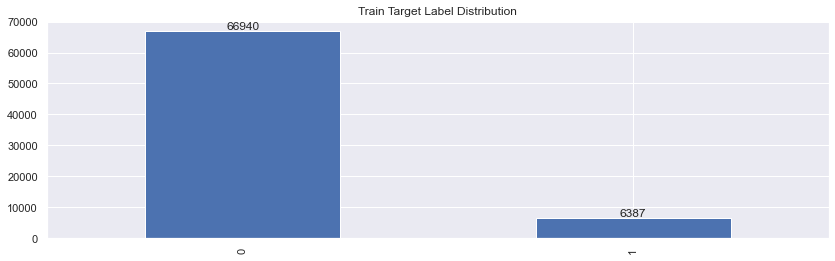

In [142]:
ax = y_train.value_counts().plot(kind='bar', title='Train Target Label Distribution', figsize=(14, 4));
ax.bar_label(ax.containers[0]);

Clearly, there is a huge disparity between the patient survival class (0) and the patient death class (1). SMOTE can be used to address this.

## 5.2. SMOTE

The final step in preparing the medical data for modeling is to balance the target labels to include more patient deaths than currently exist, ensuring a well balanced model. This is achieved by upsampling the target label with fewer counts by generating data that is statistically similar to other rows of the same target. This will take place for the Training data only.

In [143]:
from imblearn.over_sampling import SMOTE

In [144]:
# Apply SMOTE to the target variable in the training dataset

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

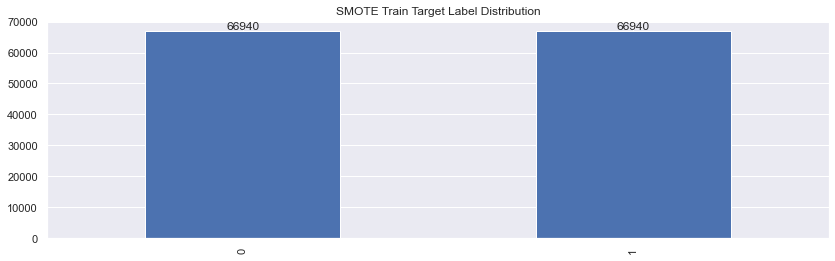

In [145]:
ax = y_train_smote.value_counts().plot(kind='bar', title='SMOTE Train Target Label Distribution', figsize=(14, 4));
ax.bar_label(ax.containers[0]);

The utilization of SMOTE has drastically increased the balanced of target labels. The data is ready for Machine Learning.

## 5.3. Machine Learning

Given that this is a binary classification problem, multiple ML classifiers can be used. For this project, the following will be used:

1. Naive Bayes
2. Logistic Regression
3. K-Nearest Neighbor
4. Random Forest

Using multiple models allows for robust model development and ensures the best possible outcome for the end model. In this way, the project is not limited to a single solution but has room for comparison and selection of the most appropriate model.

In [146]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

In [147]:
# Instantiate all Classifiers with default parameter settings and place them all in a list

NB = GaussianNB()
LR = LogisticRegression()
KNN = KNeighborsClassifier()
RF = RandomForestClassifier()

classifier_list = [NB, LR, KNN, RF]

In [148]:
# Establish parameters for Gridsearch and place them all in a list

parameters_NB = {'clf__var_smoothing': [1e-09, 1e-08]}
parameters_LR = {'clf__max_iter': [100, 200]}
parameters_KNN = {'clf__algorithm': ['ball_tree', 'kd_tree']}
parameters_RF = {'clf__n_estimators': [100, 200]}

parameters = [parameters_NB, parameters_LR, parameters_KNN, parameters_RF]

**Please note:** parameter selection options were determined with requirements of efficiency and simplicity. This project is concerned more with the comparison of different models than the optimization of a single model, therefore parameter variation is slim and not of the highest priority.

In [149]:
# Function to iterate through classifiers and train each of them on SMOTE training data.

def train_model(classifier, params, X_train, y_train):
    '''
    This function trains a classifier on training data using GridSearch.
    
    Inputs:
    
    classifier: classifier object, an sklearn classifier.
    params: dictionary, dictionary with classifier keys linked to the classifier alongside parameters to iterate through.
    X_train: pandas dataframe, feature training data 
    y_train: pandas series, target training data
    
    Returns: model object, the best model from the GridSearch for the training data. 
    '''
    
    pipeline = Pipeline([
        ('clf', classifier)
    ])
    
    parameters = params
    
    t = time.time()
    
    cv = GridSearchCV(pipeline, param_grid=parameters)
    cv.fit(X_train, y_train)
    
    elapsed_time = time.time() - t
    
    print(f'{str(classifier)[:-2]} model fit successfully, in {round(elapsed_time, 2)} seconds.')
    
    return cv

In [150]:
# Iterate through models and parameters and save the best version of each model to dictionary

model_dict = {}

for classifier, parameter in zip(classifier_list, parameters):
    model = train_model(classifier, parameter, X_train_smote, y_train_smote)
    model_dict[f'{str(classifier)[:-2]}'] = model

GaussianNB model fit successfully, in 1.91 seconds.
LogisticRegression model fit successfully, in 34.23 seconds.
KNeighborsClassifier model fit successfully, in 280.84 seconds.
RandomForestClassifier model fit successfully, in 2157.78 seconds.


In [151]:
model_dict

{'GaussianNB': GridSearchCV(estimator=Pipeline(steps=[('clf', GaussianNB())]),
              param_grid={'clf__var_smoothing': [1e-09, 1e-08]}),
 'LogisticRegression': GridSearchCV(estimator=Pipeline(steps=[('clf', LogisticRegression())]),
              param_grid={'clf__max_iter': [100, 200]}),
 'KNeighborsClassifier': GridSearchCV(estimator=Pipeline(steps=[('clf', KNeighborsClassifier())]),
              param_grid={'clf__algorithm': ['ball_tree', 'kd_tree']}),
 'RandomForestClassifier': GridSearchCV(estimator=Pipeline(steps=[('clf', RandomForestClassifier())]),
              param_grid={'clf__n_estimators': [100, 200]})}

The models have been successfully trained on multiple parameters using Gridsearch, and the best ones have been saved in the above dictionary and are ready for scoring and comparison. This will take place in the next section.

# 6. Evaluation

The evaluation of each of the trianed models can now take place. Research into which metrics are best used for classification problems in ML was conducted, and the results summarized below.

## 6.1. Metrics Discussion

Suitable metrics include model accuracy, precision, recall and F1 scores. A confusion matrix heatmap will also be of great assistance in determining how well the model has performed in terms of Type I and Type II errrors. In addition to this, the ROC curve alongisde the AUC score will be used to determine how well the model has performed in classifying unseen data.

In general, the closer the scores are to 1, the better the model has performed. Conversely, the closer the scores are to 0, the worse the model has performed. This applies to the accuracy, precision, f1, recall, and AUC scores.
To interpret the ROC curve, the closer the curve appears to the top left of the plot (i.e., the larger the area under the curve), the better the model has performed.

The reason why these metrics were chosen is due to what they represent relative to classification machine learning problems, as outlined in this [article](https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/). Before the metrics can be discussed below, a short description of the difference between false and true positives and negatives is provided:

**True Positive**: Extent to which model correctly predicts the positive class.

**True Negative**: Extent to which the model correctly predicts the negative class.

**False Positive**: Extent to which the model incorrectly predicts a negative 
class as positive.

**False Negative**: Extent to which the model incorrectly predicts a positive 
class as negative.

### 6.1.1. Accuracy

Accuracy represents how well a model is able to achieve an exact match when comparing its predicted values and the true values. It is calculated through the ratio of true positives and true negaties to all positive and negative data points. The score produced gives an idea of how accurately the model can predict the **correct** outcome, given the appropriate datapoints. Accuracy does not give any information regarding the nature of the produced model's errors.

### 6.1.2. Precision

This is the proportion of positively predicted labels that are indeed correct. Unfortunately, precision is affected by class distribution, which means that it will be lower if there are fewer of one kind of class than the other. While the training dataset underwent SMOTE in order to balance class labels, no such exercise was performed on the testing dataset (or any other biased prediction set that may exist). For this reason however, precision can be a very useful indicator when classes are very imbalanced. It is calculated by taking the ratio of the true positives to the sum of false positives and true positives. It is a great metric to see how well the model can avoid false positives.

### 6.1.3. Recall

This metric represents the model's ability to predict the positive values out of all actual positive values. A high recall shows that a model can easily identify true positive data examples, and opposite is true if the recall score is low. It is calculated by taking the ratio of true positives to the sum of false negatives and true positives. Recall is slightly different to precision, in that precision is concerned with the proportion of positively predicte labels, while the recall actually needs to correctly identify what those positive labels are. It is a great metric to see how well the model can avoid false negatives.

### 6.1.4. F1

This metric is a function of the recall and precision metrics. It is akin to accuracy in that it gives a single value which can be interpreted as the model's overall quality at a high level. It is calculated through the following formula: 
F1 = 2 * Precision * Recall / (Precision + Recall)

It is an extremely useful metric in cases where models are optimized for recall or precision, but such a use case is beyond the scope of this project.


In [152]:
from sklearn.metrics import *

In [153]:
# The below function compiles all the metrics into a neat format for analysis.

def evaluate_model(model, X_test, y_test):
    '''
    Evaluates model accuracy, f1, precision, and recall scores and places them in a confusion matrix. 
    In addition, an ROC-AUC curve is generated. 
    
    Inputs:
    
    model: sklearn classifier object, the trained classifier.
    X_test: array, the training dataset for the classifier to predict.
    y_test: pandas series, the true labels of the target variable from the testing dataset.
    
    Returns: series of metrics and plots.
    '''
    model = model_dict[model]
    
    predictions = model.predict(X_test)
    prediction_probabilities = model.predict_proba(X_test)[::,1]
    
    # Get metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    
    print(f'{str(model.estimator[0])[:-2]} Metrics:\n')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1: {f1}')
    
    # Confusion matrix
    matrix = confusion_matrix(y_test, predictions)
    sum_matrix = np.sum(matrix)
    
    matrix_00 = confusion_matrix(y_test, predictions)[0][0]
    matrix_01 = confusion_matrix(y_test, predictions)[0][1]
    matrix_10 = confusion_matrix(y_test, predictions)[1][0]
    matrix_11 = confusion_matrix(y_test, predictions)[1][1]
    
    labels = [f'True Negative\n{round(matrix_00 / sum_matrix, 3)}', 
          f'False Positive\n{round(matrix_01 / sum_matrix, 3)}', 
          f'False Negative\n{round(matrix_10 / sum_matrix, 3)}', 
          f'True Positive\n{round(matrix_11 / sum_matrix, 3)}']
    labels = np.asarray(labels).reshape(2, 2)
    
    fig, ax = plt.subplots(1, figsize=(7, 5))
    ax = sns.heatmap(matrix / sum_matrix, cmap='Blues', annot=labels, fmt='');
    ax.set(title=f'{str(model.estimator[0])[:-2]} Confusion Matrix');
    
    # ROC-AUC Plot
    false_positive_rate, true_positive_rate, _ = roc_curve(y_test,  prediction_probabilities)
    auc = roc_auc_score(y_test, prediction_probabilities)

    fig, ax1 = plt.subplots(1, figsize=(7, 5))
    ax1.plot(false_positive_rate, true_positive_rate, label=f'AUC = {str(auc)}');
    ax1.set_title(f'{str(model.estimator[0])[:-2]} ROC-AUC Score');
    ax1.set_ylabel('True Positive Rate');
    ax1.set_xlabel('False Positive Rate');
    ax1.legend(loc=4);

## 6.2. Model Evaluation

### 6.2.1. Gaussian Naive Bayes

GaussianNB Metrics:

Accuracy: 0.7714379227580188
Precision: 0.2161874334398296
Recall: 0.6655737704918033
F1: 0.32636655948553056


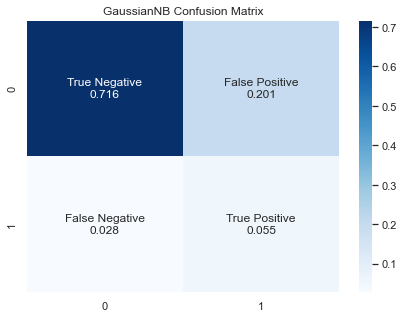

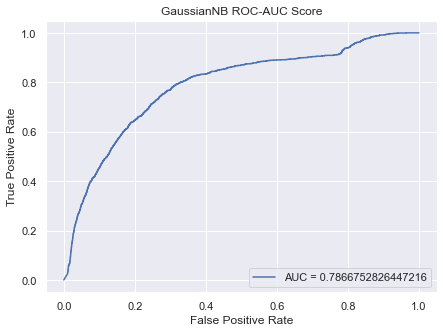

In [154]:
evaluate_model('GaussianNB', X_test, y_test)

### 6.2.2. Logistic Regression

LogisticRegression Metrics:

Accuracy: 0.7839842897665285
Precision: 0.23469165395511005
Recall: 0.7062295081967213
F1: 0.35230618253189405


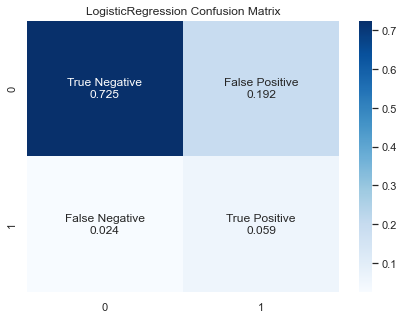

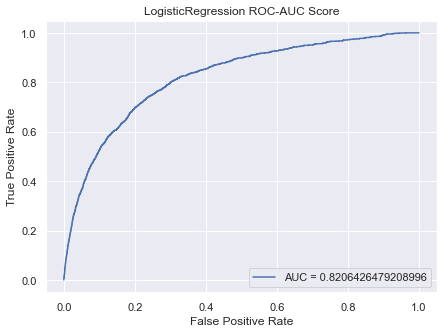

In [155]:
evaluate_model('LogisticRegression', X_test, y_test)

### 6.2.3. K-Nearest Neighbors

KNeighborsClassifier Metrics:

Accuracy: 0.7445450578223871
Precision: 0.16086769759450173
Recall: 0.4911475409836066
F1: 0.24235560588901472


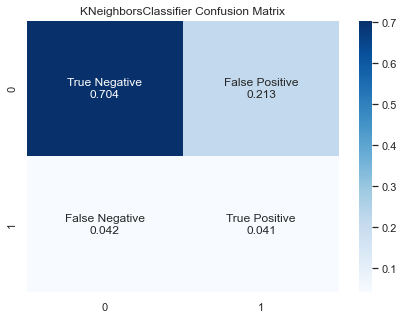

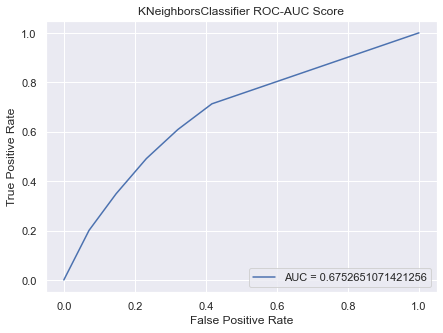

In [156]:
evaluate_model('KNeighborsClassifier', X_test, y_test)

### 6.2.4.  Random Forest

RandomForestClassifier Metrics:

Accuracy: 0.918939559240672
Precision: 0.5236363636363637
Recall: 0.28327868852459015
F1: 0.36765957446808506


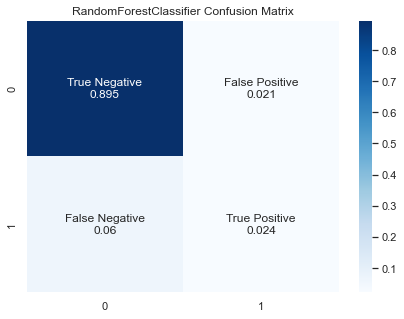

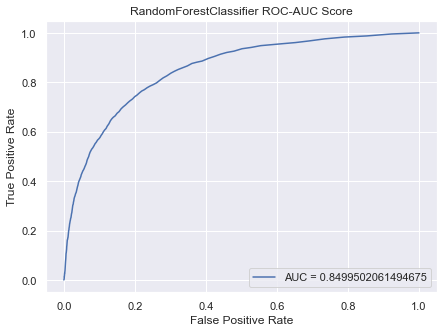

In [157]:
evaluate_model('RandomForestClassifier', X_test, y_test)

## 6.3. Discussion

In terms of **accuracy**, the RF model was clearly the best with a score of 91%. All other models scored in the high 70s, with the worst performaing model (in terms of accuracy) being KNN at 74%. For instances where accuracy is the only metric that matters, RF is the obvious choice.

In terms of **precision**, once again the RF model is superior with a score of 52%. It is alarming that the highest precision score is only 52%, however, as this shows that half the time the model predicts a patient would die, they actually would not die. The other models perform even worse, with values ranging from 16% (KNN once again) to 23%. This means that for these models, patients would survive between 84% and 77% of the time the model has determined they would not.

In terms of **recall**, the LR model scored the highest with 70%. It is worth noting that for this metric, the previously superior RF model scored dismally low, only managing to correctly predict positive values 28% of the time. It is worth noting that the other models also scored higher than RF in recall, at 49% for KNN and 66% for NB. This shows that while RF is relatively good at avoiding false positives (compared to the other trained models), it is hopelessly outshined when predicting false negatives. This kind of situation eloquently demonstrates why the precision-recall tradeoff is important, and why multiple metrics need to be taken into account when evaluating model performance.

In terms of **F1**, RF once again scores the highest at 36% (which is not good in any case). The other models are not too far behind (ranging between 24% and 35%). The overall low F1 scores are to be expected, as the recall and precision scores for all the models were not simultaneously high. Therefore, despite the high accuracy of the models, all are severely lacking in their ability to discern between false positives and false negatives.

In terms of **ROC-AUC**, RF scores the highest once again with a value of 85%. The lowest scoring model for this metric is the KNN model 67%. These scores mean that each model does an acceptable job of classifiying the data, with RF scoring it better than the others. It should also be noted that the LR model also received a high ROC-AUC score, at 82%.

## 6.4. Conclusion

Despite poor performance across the board in terms of false positive and false negative discernment, all of the models did an acceptable job of classifying unseen data. The poor recall and precision scores could be improved with further analysis and model tweaking, however this is beyond the scope of this project.

Overall, the Random Forest classifier was the highest performing model, having obtained the best accuracy, precision and ROC-AUC scores, but performing the worst in recall. The produced RF model's accuracy and ROC-AUC are deemed sufficiently high for the purposes of the problem statement declared in Section 3. 

Improvement could be achieved by retraining the models with more parameters in GridSearch, and by further refining the data preaparation process to use more advanced imputation methods for better data spread and accuracy.

**Please note**:

Medical advice and recommendations should **ALWAYS** be solicited from a qualified medical practitioner. This project in no way serves as a medical recommendation or medical advice tool.

# 7. Deployment

A technical article has been written and published on Medium. It can be found [here](https://medium.com/@loukas.perdikis/hospital-patient-survivability-a-data-science-project-9e1a67590457)

Please refer to the README file (in the root folder of this notebook) for general information on this project.